## Predicting Housing Prices Using Regression Techniques from the Iowa Dataset and Decision Tree Methods for Model Training and Prediction

#### Group members are:
**1. Monica Mbabazi  2019/HD07/24385U**

**2. Jupiter Kabahita 2019/HD07/24328U**

**3. Eric Kariuki    2019/HD0730034U**


**AIM**

The aim of this analysis is to predict the house prices based on the 80 explanatory variables / features from the data provided describing almost every aspect of residential homes.

### Workflow

1. Preparation of data
2. Exploration of Data
3. Skewness and Kurtosis 
4. Handling Missing values
5. Imputing Missing Values
6. Visualizing the Relationships between Features and Target Variable
7. Correlation
8. The correlation between the numerical variables and the target variable
9. The correlation between the categorical variables and the target variable
10. Data Transformation/Wrangling
11. Multicolinearity
12. Data Preprocessing
13. Modelling
        i. Linear Regression
        ii. Lasso
        iii. Ridge Regression
        iv. Elastic Net
        v. Stochastic Gradient Descent (SGD)
        vi. Decision Tree
        vii. XGBoost (Extreme Gradient Boosting)
        viii. Light Gradient Boosting (LGB)
        ix. Random Forest

### Data Provided
- train.csv: This is the training set
- test.csv: This is the test set
- data_description.txt: Full description of each column
- sample_submission.csv: Benchmark submission from a linear regression model

In [30]:
#Let's import all the necessary libraries to be used in this analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt# for plotting
#for plots to be embedded directly within the notebook use the code below
%matplotlib inline 
import seaborn as sns #data visualization library based on matplotlib
#!pip install missingno
import missingno as msno #for visualizing patterns of missing values in your data
import scipy.stats as stats # Imports the entire scipy.stats (all distributions)
# Import the skew-normal distribution and skewness test from scipy.stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
#import geopandas as gpd
import os # for accessing directory structures
# let's us remove all the uncessary warnings from our cells
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

# Input data files to be used are available in "../input/" directory.
# running the below command lists all the availabe files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)


###  Task 1: Loading and Reading the data
>Now let us load and read in our data with the code below and assign it to new names. Here we use the **"pd.read_csv"** since the files are in csv format. CSV files are comma separated files.


In [31]:
#Loading the datasets 

trainset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')

### Task 2: Data Exploration
Data Exploration is mainly about understanding your data  in terms of structure and size.

Data exploration is the initial step in data analysis, where users explore a large data set in an unstructured way to uncover initial patterns, characteristics, and points of interest.

During data exploration,a data scientist can use a combination of manual methods and automated tools such as data visualizations, charts, and initial reports to understand what is in a dataset and the characteristics of the data.

This process makes deeper analysis easier because it can help target future searches and begin the process of excluding irrelevant data points. In any situation where you have a massive set of information, data exploration can help cut it down to a manageable size and focus efforts to optimize your analysis.

By taking the time to perform a real exploration of your data along with visualization tools, you can also start finding correlations, patterns, and determine if a certain path is worth researching, or if the information is less usable.

Data exploration can also assist by reducing work time and finding more useful and actionable insights from the start alongside presenting clear paths to perform better analysis. https://www.sisense.com/glossary/data-exploration/

Let's try to understand the size, structure an characteristics of our data and also patterns in our data to guide us on how to prepare and process our data for machine learning.

`Data dimensions`
>We need to know how much data you have both in terms of row and column number

>This will give an insight on how much time the algorithm might take to train, algorithms take long to train on data with many rows and fewer rows may lead to underfitting of the model. Too many features/columns may cause overfitting of some algorithms due to the curse of dimensionality.

>Too many features/columns may cause overfitting of some algorithms due to the curse of dimensionality(https://mc.ai/confronting-the-curse-of-dimensionality).

>Let’s also use pandas .shape attribute to view the number of samples/rows and features we’re dealing with at this stage:

In [32]:
#Getting the dimensions of the data in each dataset
print(trainset.shape)
print('\n', testset.shape) # Print testset in a newline

(1460, 81)

 (1459, 80)


In [33]:
# Obtaining per column information 
print(trainset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [34]:
# Getting the column information for the test data
print(testset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

- Based on the output above, we can tell that some of the columns in our data are numeric and categorical. We can also tell that our two datasets contain missing values. Those columns in the data that do not contain 1459 entries, contain missing values.

In [35]:
#Randomly obtaining 10 samples of the trainset
trainset.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1305,1306,20,RL,108.0,13173,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,325000
1356,1357,20,RL,NaN,9477,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,10,2008,WD,Normal,110000
1334,1335,160,RM,24.0,2368,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,125000
274,275,20,RL,76.0,8314,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,124500
209,210,20,RL,75.0,8250,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,145000
105,106,60,FV,75.0,9375,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,250000
206,207,20,RL,40.0,13673,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,143900
544,545,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,179665
1368,1369,120,RM,NaN,4435,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,144000
1143,1144,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,80000


In [36]:
#Randomly obtaining 10 samples of the trainset
testset.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
915,2376,20,RL,80.0,12000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
205,1666,20,RL,129.0,16870,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal
877,2338,20,RL,91.0,11830,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,New,Partial
892,2353,60,FV,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
1004,2465,50,RL,60.0,8850,Pave,Pave,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal
1037,2498,20,RL,60.0,5400,Pave,NaN,Reg,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
203,1664,20,RL,105.0,13693,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
973,2434,20,RL,70.0,7903,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Family
1413,2874,50,RL,60.0,10890,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal
1211,2672,120,RL,43.0,3087,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,New,Partial


In [37]:
#lets get the numerical columns

print(trainset.dtypes[trainset.dtypes != 'object'].index, '\n')
print("Number of numeric columns: ", len(trainset.dtypes[trainset.dtypes != 'object'].index))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 

Number of numeric columns:  38


In [38]:
#Lets get a few numeric columns
numeric=trainset.dtypes[trainset.dtypes != 'object'].index
trainset[numeric].sample(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1438,1439,20,90.0,7407,6,7,1957,1996,0.0,600,...,0,158,158,0,0,0,0,4,2010,149700
1310,1311,20,100.0,17500,7,8,1959,2002,0.0,1406,...,0,207,162,0,0,0,0,5,2010,335000
560,561,20,NaN,11341,5,6,1957,1996,180.0,1302,...,0,0,0,0,95,0,0,5,2010,121500
824,825,20,81.0,11216,8,5,2006,2006,0.0,0,...,0,140,0,0,0,0,0,6,2006,232600
489,490,180,21.0,1526,4,8,1970,2002,0.0,515,...,0,0,0,0,0,0,0,5,2009,86000


In [39]:
#lets get the categorical columns

print(trainset.dtypes[trainset.dtypes == 'object'].index, '\n')
print("Number of categorical columns: ", len(trainset.dtypes[trainset.dtypes == 'object'].index))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object') 

Number of categorical columns:  43


In [40]:
#Lets randomly display 5 categorial columns in our data set
categorical=trainset.dtypes[trainset.dtypes == 'object'].index
trainset[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1191,FV,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1274,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
928,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1406,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,...,Detchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
913,RH,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,...,2Types,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Descriptive Statistics
Descriptive statistics can give us great insight into the shape of each attribute. helps you to understand your data and is a very important part of Machine Learning. This is due to Machine Learning being all about making predictions (https://machinelearningmastery.com/understand-machine-learning-data-descriptive-statistics-python).

This will help us understand better what the data is trying to distributed, which will result in an overall better machine learning model and understanding.

Central tendency which in this case is indicated by 'mean'determines the tendency for the values of your data to cluster around its mean.

interquartile range (IQR)and standard deviation measure the amount of spread or variability within your data.

By default the describe() function on the Pandas lists 8 statistical properties of each attribute as indicated in the output below.

Since some columns of our data have numeric values and others have cateorical values, we think it is a better ideal to get descriptive statistics of numeric and categorical columns separate.

In [41]:
# Descriptive statistics of each of the numerical features for the trainset
trainset.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [42]:
# Descriptive statistics of each of the categorical features for the trainset
trainset.describe(exclude=[np.number])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [43]:
#lets generate descriptive statistics of the test dataset
#lets first, for the numeric columns
testset.describe(exclude='object')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [44]:
#lets generate descriptive statistics for categorical columns of the test data
testset.describe(exclude='number')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,...,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,...,853,625,1293,1328,1301,2,172,46,1258,1204


#### Visualizations for some Attributes to the Target Variable
- This was done randomly to get a rough understanding of how different variables affected the 'SalePrice'.

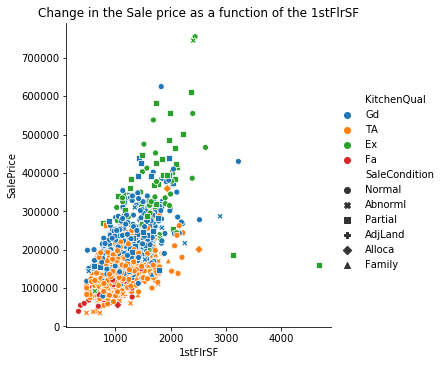

In [45]:
sns.relplot(y="SalePrice", x="1stFlrSF", hue="KitchenQual",style="SaleCondition", data=trainset).set(title='Change in the Sale price as a function of the 1stFlrSF')
# default for relplot is scatter
#y and x are variable in data
#hue, categorical or numeric variable in data that will produce different coluring
#style is a variable in the data that will produce dif

### Distribution of the target variable

- We shall look at the Skewedness and Kurtosis: Skewness and Kurtosis are two moment based measures that will help you to quickly calculate the degree of departure from normality.

### **Skewness** and **Kurtosis** 
 >Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another. Many machine learning algorithms assume a Gaussian distribution.

>Skewed data is common in data science; and this is simply the degree of distortion from a normal distribution. So,knowing that an attribute has a skew may allow us to perform data preparation to correct the skew and later improve the accuracy of your models (https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model, https://machinelearningmastery.com/how-to-develop-an-intuition-skewed-class-distributions/).

>The data can be either positive skewed(when the curve is more deviated towards the right) or negatively skewed (the curve is more deviated towards the left). 

>If skewness value lies above +1 or below -1, data is highly skewed it is recommended to fix the skewness to make good decisions by the model.A log transformation can help to fit a very skewed distribution into a Gaussian one. It and can be used to reduce right skewness.If the tail is to the left of data, then it is called left skewed data or negatively skewed data. Common transformations include square , cube root and logarithmic.

**Data Kurtosis**
>Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers.

>If there is a high kurtosis, then, we need to investigate why do we have so many outliers. It indicates a lot of things, maybe wrong data entry or other things. If we get low kurtosis(too good to be true), then also we need to investigate and trim the dataset of unwanted results.https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm, https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa.
- The histogram is an effective graphical technique for showing both the skewness and kurtosis of the data set's target variable.
- We shall use the logarithmic transformation in this analysis to correct the skewedness and kurtosis in our data.
- This is first only corrected for the target variable. After feature importance is done and features selected, then log transformation will be done on the ramaining features to correct for skewness and kurtosis. The remaining features will be selected based on factors such as correlation and multicolinearity with the target variable.

In [46]:
#descriptive statistics summary of the target variable
trainset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

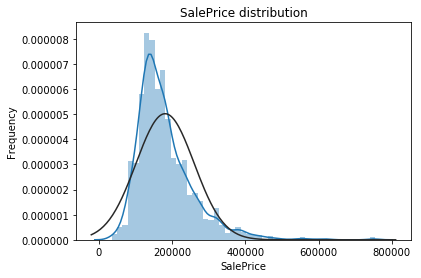

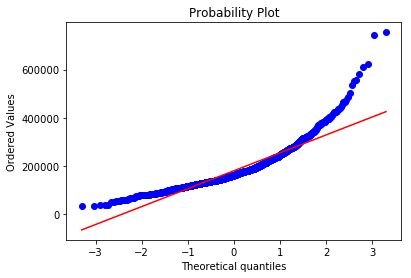

Skewness: 1.882876
Kurtosis: 6.536282


In [47]:
# Exploring the target/class variable to understand data skewness and kurtosis using seaborn
from scipy.stats import skew,norm
sns.distplot(trainset.SalePrice,fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(trainset['SalePrice']);
# QQ-plot
fig = plt.figure()
res = stats.probplot(trainset['SalePrice'], plot=plt)
plt.show()
#lets check the level of skewedness and kurtosis
print("Skewness: %f" % trainset['SalePrice'].skew())
print("Kurtosis: %f" % trainset['SalePrice'].kurt())

*According to the above plots, target variable is right skewed(positive skewness) and show peakedness. As (linear) models fits better on normally distributed data , we require proper transformation. Here we shall use the log transformation to correct the skewedness.*

In [48]:
#Showing the data Skewness
print("Skewness: %f" % trainset['SalePrice'].skew())
print("Kurtosis: %f" % trainset['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#### Loga Transformation

Logarithm transformation (or log transform) is one of the most commonly used mathematical transformations in feature engineering. What are the benefits of log transform:
- It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.
- It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.

A critical note: The data you apply log transform must have only positive values, otherwise it will flag an error. You can add 1 to your data before transform it (Log(x+1)). Thus, you ensure the output of the transformation to be positive.https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

- In this case the target variable we want to transform have positive values and so there is no need to add a 1.

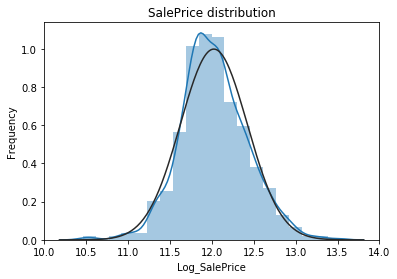

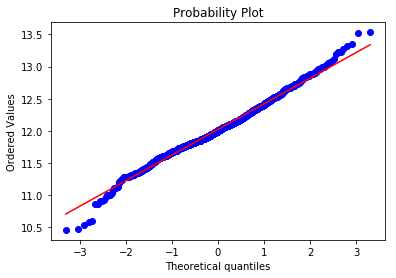



Skewness: 0.121335
Kurtosis: 0.809532


In [49]:
#Log Transformation and input to new variable 'Log_SalePrice'

trainset['Log_SalePrice'] = np.log(trainset['SalePrice'])

#Plotting the log transformed data
sns.distplot(trainset['Log_SalePrice'], bins = 20, fit=norm)
plt.ylabel('Frequency')
plt.title('SalePrice distribution');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(trainset['Log_SalePrice']);
# QQ-plot
fig = plt.figure()
res = stats.probplot(trainset['Log_SalePrice'], plot=plt)
plt.show()
print('\n')
print("Skewness: %f" % trainset['Log_SalePrice'].skew())
print("Kurtosis: %f" % trainset['Log_SalePrice'].kurt())

In [50]:
#Dropping the initial untransformed 'SalePrice' column

trainset = trainset.drop('SalePrice', axis = 1)

Task 3:  Data preparation and preprocessing
-------------------------------------------
Data Preparation is the heart of data science. It includes data cleansing and feature engineering.

`Data cleaning during machine learning`

In the context of data science and machine learning, data cleaning means filtering and modifying your data such that it is easier to explore, understand, and model.

Cleaning your data should be the next step in your Machine Learning (ML) workflow after data exploration. Without clean data you’ll be having a much harder time seeing the actual important parts in your exploration. 
- Better data beats fancier algorithms.
- In other words... garbage in gets you garbage out. Thats why we need to clean our data.
- In fact, if you have a properly cleaned dataset, even simple algorithms can learn impressive insights from the data!

Obviously, different types of data will require different types of cleaning.

`How can data preparation be performed?`
- Below are some of the basic pre — processing techniques that can be used to convert raw data.

**Conversion of data:** As we know that Machine Learning models can only handle numeric features, hence categorical and ordinal data must be somehow converted into numeric features.

**Remove Unwanted observations:**
The first step to data cleaning is removing unwanted observations from your dataset.
- This includes duplicate or irrelevant observations.
>Duplicate observations most frequently arise during data collection.

>Irrelevant observations are those that don’t actually fit the specific problem that you’re trying to solve.

**Fix Structural Errors:**
>The next bucket under data cleaning involves fixing structural errors.

>Structural errors are those that arise during measurement, data transfer, or other types of "poor housekeeping."
- For instance, you can check for typos or inconsistent capitalization.This is mostly a concern for categorical features. After replacing typos and inconsistent capitalization, the class distribution becomes much cleaner.

>Finally, check for mislabeled classes, i.e. separate classes that should really be the same.
- e.g. If ’N/A’ and ’Not Applicable’ appear as two separate classes, you should combine them.
**Filter Unwanted Outliers:**
>Outliers can cause problems with certain types of models. For example, linear regression models are less robust to outliers than decision tree models.

>In general, if you have a legitimate reason to remove an outlier, it will help your model’s performance.

>However, outliers are innocent until proven guilty. You should never remove an outlier just because it’s a "big number or small number."

>There must be a good reason for removing an outlier, such as suspicious measurements that are unlikely to be real data.

**Handle Missing Data:**
>Missing data is a deceptively tricky issue in applied machine learning.

>You cannot simply ignore missing values in your dataset. You must handle them in some way for the very practical reason that most algorithms do not accept missing values.

`There are 2 most commonly recommended ways of dealing with missing data:`

 - **Dropping** observations that have missing values

 - **Imputing** the missing values based on other observations

>Dropping missing values is sub-optimal because when you drop observations, you drop information.
 - The fact that the value was missing may be informative in itself.
 - In the real world, you often need to make predictions on new data even if some of the features are missing!
 -  If more than 50% values in any particular column are missing then we can exclude that column. This will allow us to work faster and our data set is large enough that it will still be meaningful without them.

**Imputing missing values:** Imputation is a method to fill in the missing values with estimated ones.

`There are many options we could consider when replacing a missing value, for example:`
- A constant value that has meaning within the domain, such as 0, distinct from all other values.
- A value from another randomly selected record.
- A mean, median or mode value for the column.
- A value estimated by another predictive model.
- Multiple Imputations.
- Regression Imputation.
- Stochastic Regression Imputation.
https://www.hindawi.com/journals/mpe/2015/538613/

>Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data/nulls for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.https://towardsdatascience.com/data-preparation-and-exploration-5e09b92cf00e

>Any imputing performed on the training dataset will have to be performed on new data in the future when predictions are needed from the finalized model. This needs to be taken into consideration when choosing how to impute the missing values https://machinelearningmastery.com/handle-missing-data-python/

- If we have many missing values, we don’t want to proceed into their deletions because that would lead to a loss of a ton of data which would influence the predictive model’s performance. In this case we would either replace the values with the median/mean/model or/and add another column that shows if the other variable has a missing value or not.

#### Remember the quality of your inputs decide the quality of your output.
*The first thing we shall do is to count how many missing values we have in our dataset and try to visualize their distributions.* 

### Handling Missing Values

- The following are visualizations of missing value patterns in our train and test datasets for the variables using bargraphs and a heatmap.

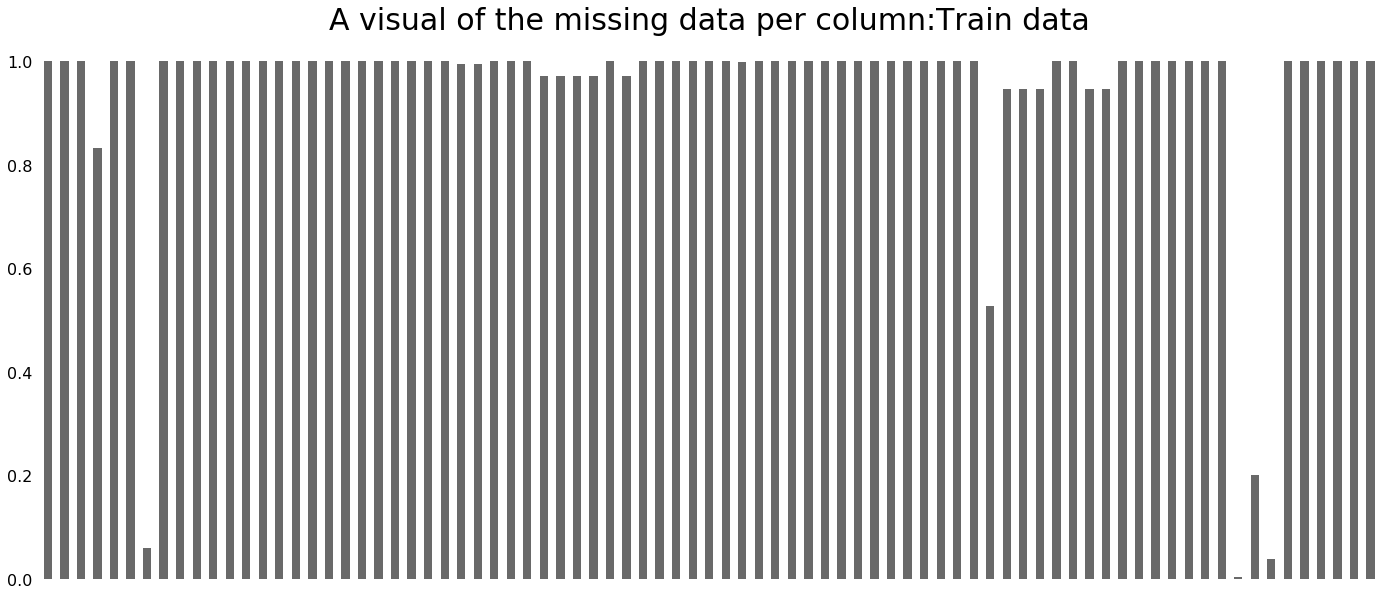

In [51]:
#Missing data per column for the training dataset
msno.bar(trainset.sample(1000)).set_title('A visual of the missing data per column:Train data', fontdict={'fontsize': 30, 'fontweight': 'medium'})

plt.show()

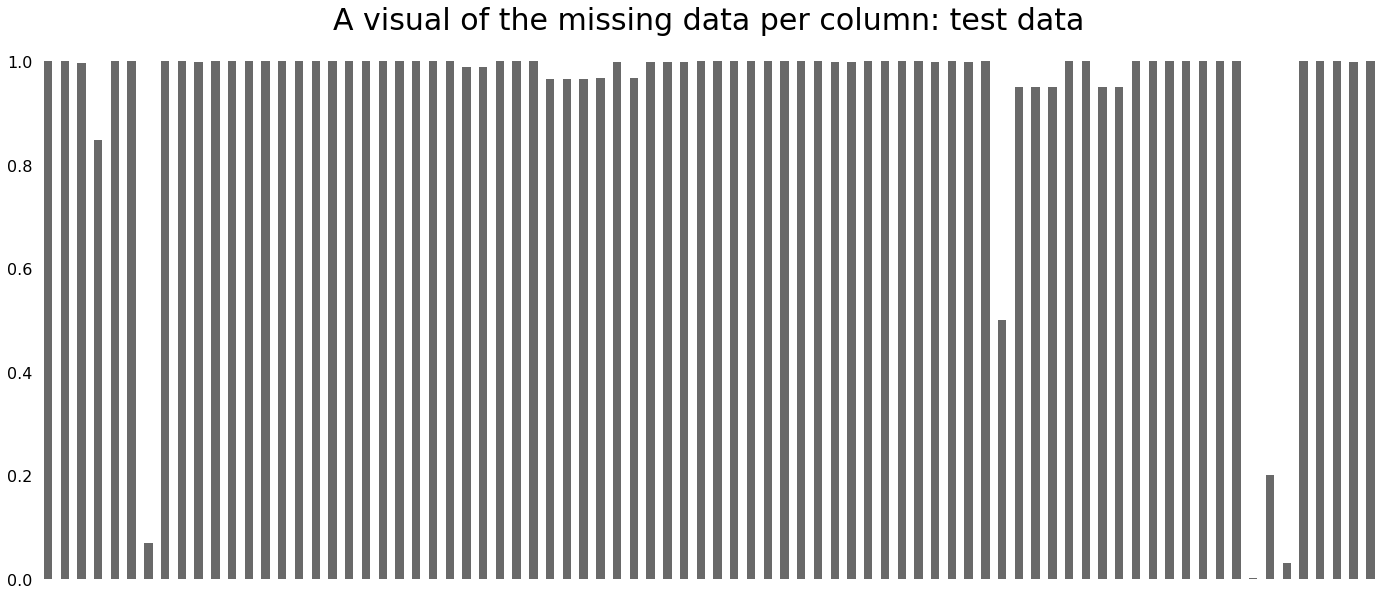

In [52]:
#Missing data per column for the test dataset
msno.bar(testset.sample(1000)).set_title('A visual of the missing data per column: test data', fontdict={'fontsize': 30, 'fontweight': 'medium'})
plt.show()

Text(0.5, 1.0, 'How strongly the presence or absence of one variable affects the presence of another')

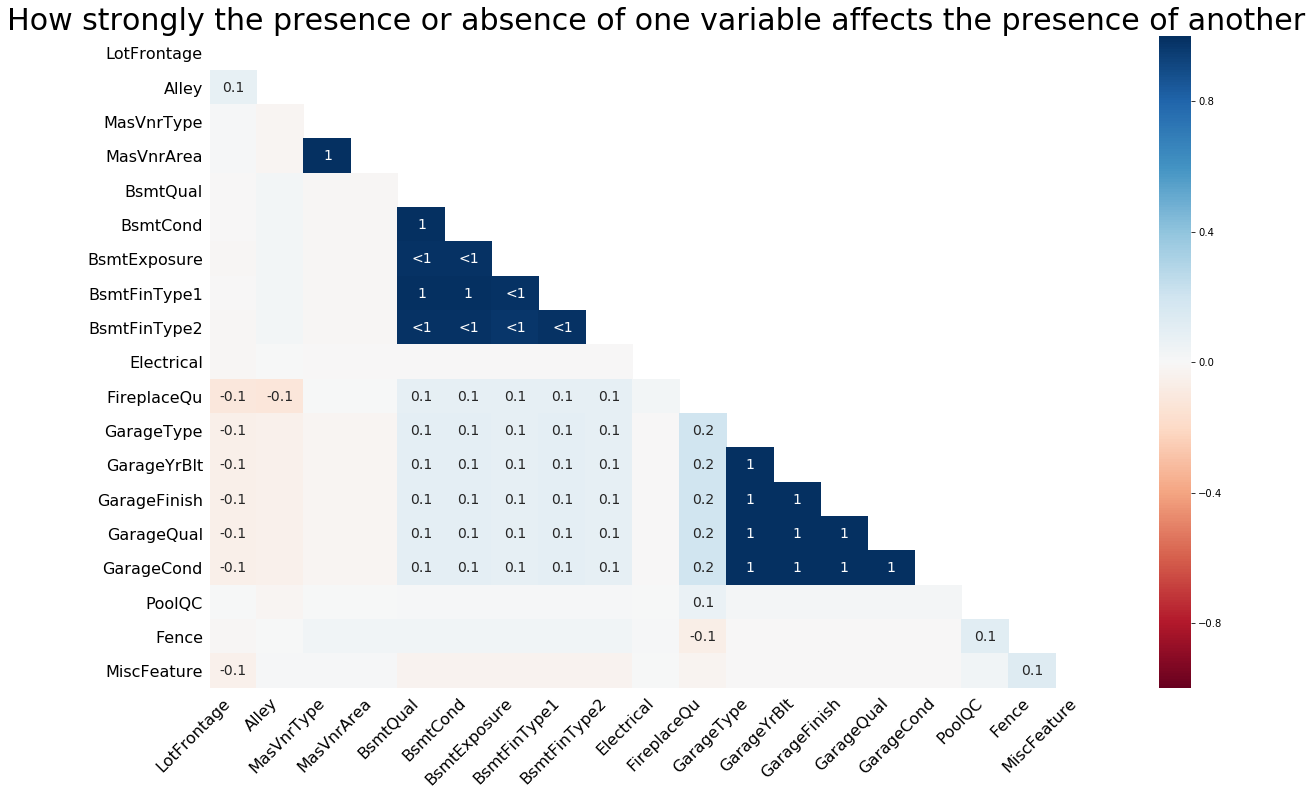

In [53]:
#measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:
msno.heatmap(trainset).set_title('How strongly the presence or absence of one variable affects the presence of another', fontdict={'fontsize': 30, 'fontweight': 'medium'}) 

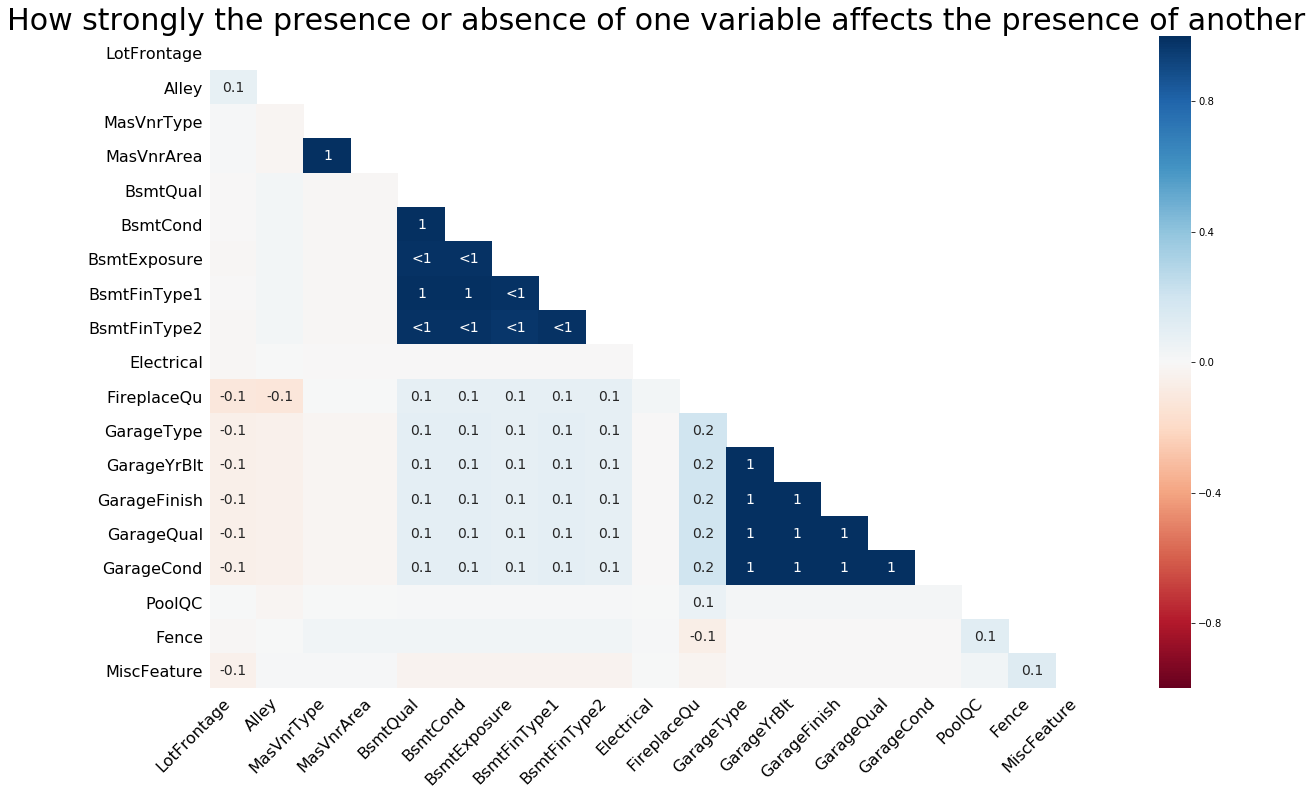

In [54]:
#measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:
msno.heatmap(trainset).set_title('How strongly the presence or absence of one variable affects the presence of another', fontdict={'fontsize': 30, 'fontweight': 'medium'}) 

plt.show()

Based on the visualisation plots above, we see that our data have some features with missing values and these need to be handled either by imputing or dropping them since machine learning models do not torelate the missing values.

- In this analysis we propose to handle missing data using the imputation approach.

#### Imputing missing values
- Based on feature description provided, following features if has NA means it's absent("None").
 - This tells us that a lot of the nan entries are not actually missing values. 
 
#### Imputing with Mean
- The remaining na values are imputed using the means of their specific columns. Imputing using the mean is preferred as it takes into account/factors in the entire sample size.
- However the variability is reduced and the standard deviations and variances tend to be underestimated

In [55]:
names=[]
valuesper=[]
actual_values=[]
l=len(trainset)
for index,i in enumerate(trainset.isnull().sum()):
    if i>0:
        valuesper.append((i/l)*100)
        actual_values.append(i)
        names.append(trainset.columns[index])
valuesper.sort(reverse=True)
actual_values.sort(reverse=True)

d={"total missing":actual_values, "percentage missing":valuesper}
#pd.DataFrame(data=(valuesper),index=names,columns=["percentage of missing data"])
pd.DataFrame(data=d,index=names)

,total missing,percentage missing
LotFrontage,1453,99.520548
Alley,1406,96.301370
MasVnrType,1369,93.767123
MasVnrArea,1179,80.753425
BsmtQual,690,47.260274
BsmtCond,259,17.739726
BsmtExposure,81,5.547945
BsmtFinType1,81,5.547945
BsmtFinType2,81,5.547945
Electrical,81,5.547945


In [56]:
cols_tofill = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

for col in cols_tofill:
    trainset[col].fillna('None', inplace = True)
    testset[col].fillna('None', inplace = True)

def msg(df):
    global names
    names=[]
    valuesper=[]
    actual_values=[]
    l=len(trainset)
    for index,i in enumerate(df.isnull().sum()):
        if i>0:
            valuesper.append((i/l)*100)
            actual_values.append(i)
            names.append(df.columns[index])
    valuesper.sort(reverse=True)
    actual_values.sort(reverse=True)
    d={"total missing":actual_values, "percentage missing":valuesper}
#pd.DataFrame(data=(valuesper),index=names,columns=["percentage of missing data"])
    return(pd.DataFrame(data=d,index=names))

msg(trainset)

,total missing,percentage missing
LotFrontage,259,17.739726
MasVnrArea,81,5.547945
GarageYrBlt,8,0.547945


*As can be seen above, the output of the categorical set is empty. This means there are no missing values in any of the categorical columns. However, three nof the numerical features still have missing values.*

In [57]:
#Obtaining the total missing values for the testset
msg(testset)

,total missing,percentage missing
LotFrontage,227,15.547945
MasVnrArea,78,5.342466
BsmtFinSF1,15,1.027397
BsmtFinSF2,2,0.136986
BsmtUnfSF,2,0.136986
TotalBsmtSF,1,0.068493
BsmtFullBath,1,0.068493
BsmtHalfBath,1,0.068493
GarageYrBlt,1,0.068493
GarageCars,1,0.068493


In [58]:
#Getting a picture of categorical and numerical features that still contain missing data.
num_attr=trainset.dtypes[trainset.dtypes!=object]
cat_attr=trainset.dtypes[trainset.dtypes==object]
misng_num=set(num_attr.index)& set(names) # names variable has the attribute with missing data
misng_cat=set(cat_attr.index)& set(names)

print("Categorical attributes still missing data:", misng_cat, "\n")
print("Numerical attributes still missing data:", misng_num,"\n")

#set(names)

Categorical attributes still missing data: set() 

Numerical attributes still missing data: {'GarageArea', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 'BsmtFullBath', 'BsmtFinSF1', 'LotFrontage', 'GarageCars'} 



In [59]:
## Imputing all the mssing values in the trainset and the testset with the mean of their respective columns.
for i in misng_num:
    trainset.fillna({i:trainset[i].mean()}, inplace = True)
    testset.fillna({i:trainset[i].mean()}, inplace = True)
    print(trainset[i].isnull().sum())
    print(testset[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


*From the above output, the missing values are now zero for each of the columns that had missing values.*

In [60]:
### Getting the attributes with skew
num=trainset.select_dtypes(include="number",exclude="object")

with_skew=[]

for i in num.columns:
    #print(train1[i].skew())
    if num[i].skew() < -1 or num[i].skew() > 1:
        with_skew.append(i)
        print("skewness for", i, "is", num[i].skew())
        #print("skewness for", i, "is", train_num[i].kurtosis())

skewness for MSSubClass is 1.4076567471495591
skewness for LotFrontage is 2.3849501679427925
skewness for LotArea is 12.207687851233496
skewness for MasVnrArea is 2.676411784729959
skewness for BsmtFinSF1 is 1.685503071910789
skewness for BsmtFinSF2 is 4.255261108933303
skewness for TotalBsmtSF is 1.5242545490627664
skewness for 1stFlrSF is 1.3767566220336365
skewness for LowQualFinSF is 9.011341288465387
skewness for GrLivArea is 1.3665603560164552
skewness for BsmtHalfBath is 4.103402697955168
skewness for KitchenAbvGr is 4.488396777072859
skewness for WoodDeckSF is 1.5413757571931312
skewness for OpenPorchSF is 2.3643417403694404
skewness for EnclosedPorch is 3.08987190371177
skewness for 3SsnPorch is 10.304342032693112
skewness for ScreenPorch is 4.122213743143115
skewness for PoolArea is 14.828373640750588
skewness for MiscVal is 24.476794188821916


In [61]:
#for df in [trainset, testset]:
   # df['GrLivArea_Log'] = np.log(df['GrLivArea'])
   # df.drop('GrLivArea', inplace = True, axis = 1)
   # df['LotArea_Log'] = np.log(df['LotArea'])
    # df.drop('LotArea', inplace = True, axis = 1)

In [62]:
#print(trainset['LotArea_Log'].skew(), '\n',
 #     trainset['LotArea_Log'].kurt())

In [63]:
#sns.distplot(trainset['LotArea_Log'])

In [64]:
#After the editions made to some of the variables
numeric = trainset.dtypes[trainset.dtypes != 'object'].index
trainset[numeric].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Log_SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429216


### Correlation Between Attributes
Correlation refers to the relationship between two variables and how they may or may notchange together. The most common method for calculating correlation is Pearson's Correlation Coefficient, that assumes a normal distribution of the attributes involved.

Correlation analysis is an extensively used technique that identifies interesting relationships in data. Correlation is used as a basic quantity for many modelling techniques.

A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no correlation at all. Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in your dataset.

Feature correlation is considered one important step in the feature selection phase of the data pre-processing especially if the data type for the features is continuous.

One or multiple attributes depend on another attribute or a cause for another attribute or associated with other attributes.

Pearson Correlation Coefficient can be used with continuous variables that have a linear relationship If the variables have a non-linear relationship, we can measure the correlation using Spearman Correlation Coefficient

So, why is correlation useful in this case of ML?

Correlation can help in predicting one attribute from another (Great way to impute missing values). Correlation can (sometimes) indicate the presence of a causal relationship. If your dataset has perfectly positive or negative attributes then there is a high chance that the performance of the model will be impacted by a problem called *“Multicolinearity”.*

Multicollinearity happens when one predictor variable can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results.

It is clear that correlated features means that they bring the same information, so it is logical to remove one of them.Removing correlated features helps to infer meaning about the features.

Luckily,some algorithms like decision trees and boosted trees are immune to multicollinearity by nature. When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or Linear Regression are not immune to that problem and you should fix it before training the model.

>*How Can I Deal With This Problem?*

There are multiple ways to deal with this problem.

The easiest way is to delete or eliminate one of the perfectly correlated features.
Another way is to use a dimension reduction algorithm such as Principle Component Analysis (PCA).
Here are links to the reference that we used: https://towardsdatascience.com/why-feature-correlation-matters-a-lot

Under correlation we shall look at the pairwise(correlation between two attributes) and how other attributes correlate to our target variable. We shall look at both numeric and categorical variable separately in relation to the target variable.

#### Visualizing the Relationships between  Features and Target Variable
- `regplot` is used in the visualization of two features' relationships in the given dataset i.e. the relations between different features and the target feature in this case `'Log_SalePrice'`

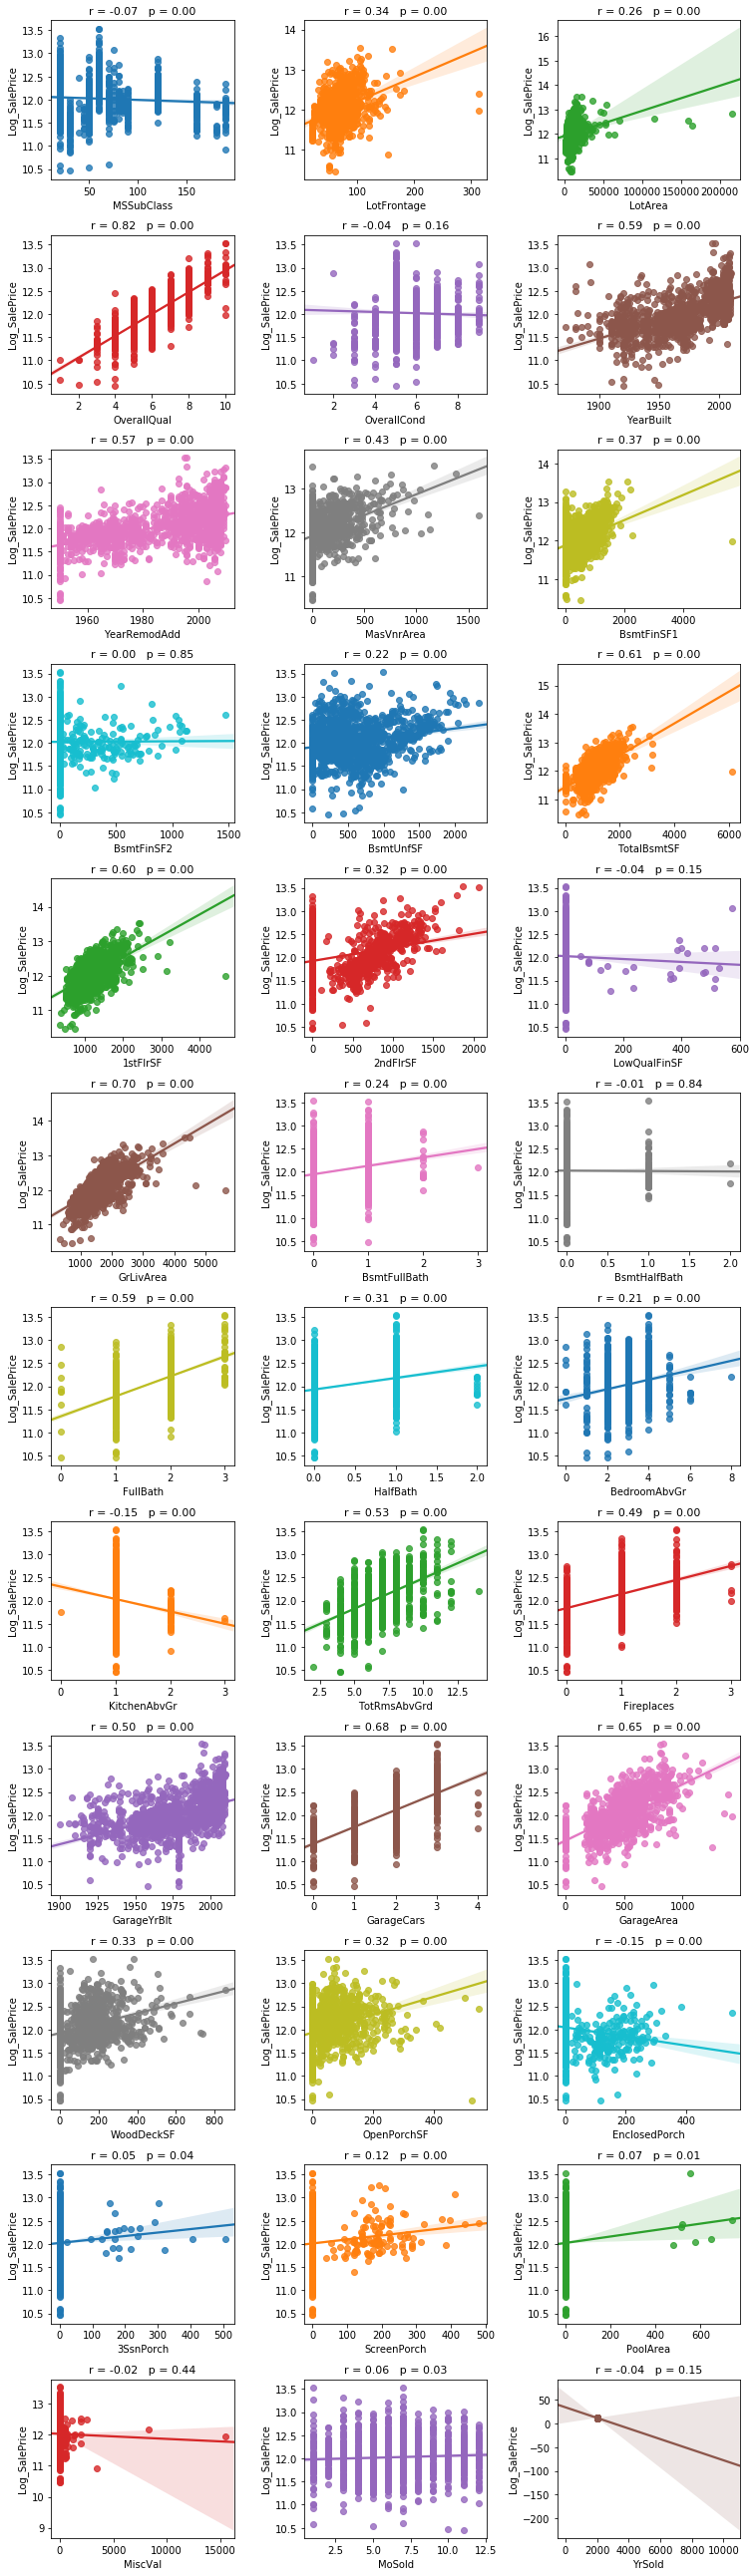

In [65]:
#Plotting for the visualization of relationships between a few selected features and the target feature
row = 12
col = 3

fig, axs = plt.subplots(12, 3, figsize = (col*3.5, row*3))

feats = list(numeric)
not_plot = ['Id', 'SalePrice', 'Log_SalePrice']
featsplot = [c for c in list(numeric) if c not in not_plot]

for r in range(0, row):
    for c in range(0, col):
        i = r*col+c
        if i < len(featsplot):
            sns.regplot(trainset[featsplot[i]], trainset['Log_SalePrice'], ax = axs[r][c])
            
            statp = stats.pearsonr(trainset[featsplot[i]], trainset['Log_SalePrice'])
#statp returns float figures, the p- value and the correlation coefficient (r).
# The correlation coefficient (r), measures the linear relationships between features under observation.

            str_title = 'r = ' + '{0:.2f}'.format(statp[0]) + '   ' 'p = ' + '{0:.2f}'.format(statp[1])
            axs[r][c].set_title(str_title, fontsize = 11)
            
plt.tight_layout()
plt.show()

In [66]:
trainset['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

#### Dealing with the most proficient outliers

In [67]:
#Dropping Outliers 'OverallQual' feature

trainset = trainset.drop(trainset[(trainset['OverallQual'] == 10) & (trainset['Log_SalePrice']<12.3)].index)

In [68]:
#Dropping outliers in the 'GrLivArea_Log' feature 

trainset = trainset.drop(trainset[(trainset['GrLivArea']>4023) & (trainset['Log_SalePrice']<12.5)].index)

In [69]:
#To check the dimensions of the trainset dataframe
trainset.shape

(1458, 81)

#### The correlation between the numerical variables and the target variable: 'Log_SalePrice'

In [70]:
#calculation of the correlation coefficient with respect to target feature

cor = trainset.corr()
cor_abs = cor.abs()
target = 'Log_SalePrice'
#To return the n number of rows, ordered by the columns with the largest correlation values in descending order
num_ft = len(numeric)
c_ord = cor_abs.nlargest(num_ft, target)[target] 
print(c_ord)

Log_SalePrice    1.000000
OverallQual      0.821404
GrLivArea        0.725211
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
BsmtFinSF1       0.392283
LotFrontage      0.352432
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
LotArea          0.260544
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
MiscVal          0.020012
Id               0.017774
BsmtHalfBath     0.005124
BsmtFinSF2       0.004863
Name: Log_Sa

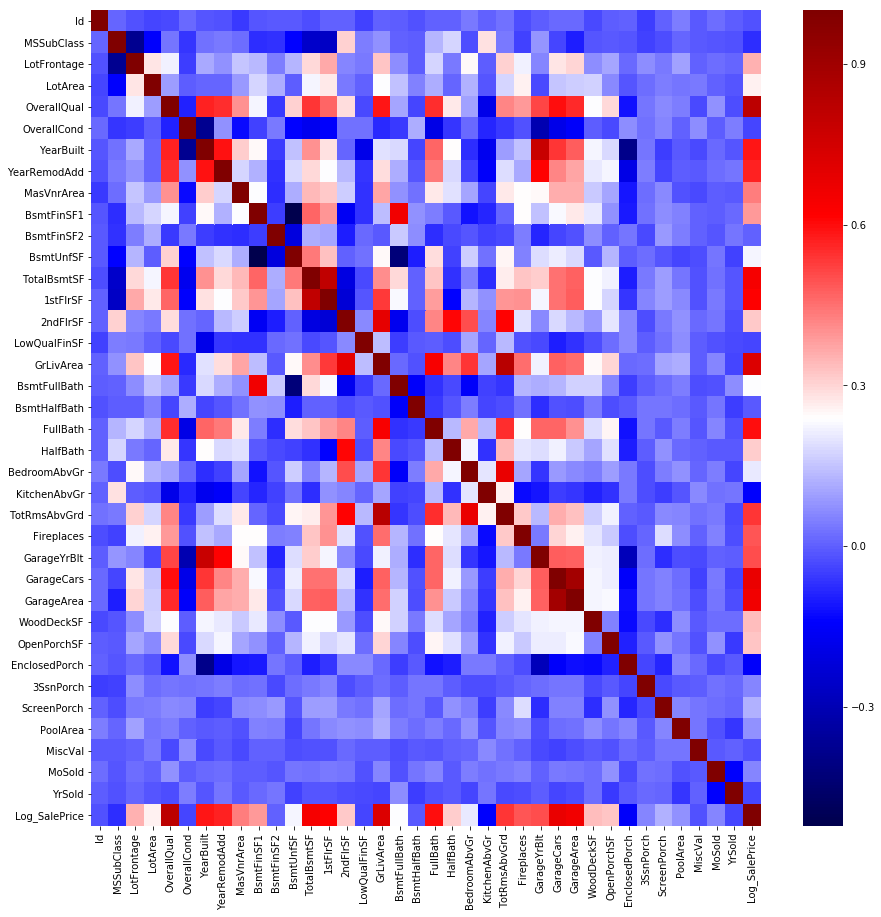

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(trainset.corr(method='pearson'),cmap='seismic')

In [72]:
#Setting a minimum correlation threshold of 0.5
mincorval = 0.5

above_thresh = list(c_ord[c_ord.values > mincorval].index)
print(above_thresh)

['Log_SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt']


In [73]:
#Printing out all the columns with a correlation values below set threshold in a list
below_thresh = list(c_ord[c_ord.values < mincorval].index)
print(below_thresh)

['Fireplaces', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


In [74]:
#Ordered list of correlation between the different features to the target variable
print(c_ord)

Log_SalePrice    1.000000
OverallQual      0.821404
GrLivArea        0.725211
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
BsmtFinSF1       0.392283
LotFrontage      0.352432
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
LotArea          0.260544
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
MiscVal          0.020012
Id               0.017774
BsmtHalfBath     0.005124
BsmtFinSF2       0.004863
Name: Log_Sa

- As mentioned above, the skewness and kurtosis of the selected variables based on correlation will be looked at and rectified using `log transformation`.

In [75]:
#Checking the skewness and kurtosis of the selected numerical features based on correlation.
for col in above_thresh:
    print('{:15}'.format(col),
         'Skewness: {:06.5f}'.format(trainset[col].skew()), '  ',
          
         'Kurtosis: {:06.5f}'.format(trainset[col].kurt()))

Log_SalePrice   Skewness: 0.12157    Kurtosis: 0.80476
OverallQual     Skewness: 0.20079    Kurtosis: 0.07496
GrLivArea       Skewness: 1.01099    Kurtosis: 2.06346
GarageCars      Skewness: -0.34238    Kurtosis: 0.22211
GarageArea      Skewness: 0.13175    Kurtosis: 0.76129
TotalBsmtSF     Skewness: 0.51170    Kurtosis: 1.77011
1stFlrSF        Skewness: 0.88764    Kurtosis: 1.11739
FullBath        Skewness: 0.03127    Kurtosis: -0.86997
YearBuilt       Skewness: -0.61229    Kurtosis: -0.43983
YearRemodAdd    Skewness: -0.50184    Kurtosis: -1.27392
TotRmsAbvGrd    Skewness: 0.66050    Kurtosis: 0.85758
GarageYrBlt     Skewness: -0.66718    Kurtosis: -0.26665


  -  For skewness to be regarded fit for normal distribution, it ranges from between (−1,1) and (−2,2) for kurtosis is an acceptable range for being normally distributed. From above, all the values fall within that acceptable range.

### The correlation between the categorical variables and the target variable

- The ultimate goal is to covert the categorical features to a numerical format simply because ML models donot accept the categorical variablles. To do this, we first grouped the categorical features, then assigned them numerical labels by encoding. From this, it is then possible to calculate their correlation.

In [76]:
#Printing the list of categorical features
print(list(categorical))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [77]:
#Printing the value counts in each of the categorical variable columns

for cat in list(categorical):
    print(trainset[cat].value_counts(), '\n', '_'*25) #Printing the output in a newline


RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 
 _________________________
Pave    1452
Grvl       6
Name: Street, dtype: int64 
 _________________________
None    1367
Grvl      50
Pave      41
Name: Alley, dtype: int64 
 _________________________
Reg    925
IR1    483
IR2     41
IR3      9
Name: LotShape, dtype: int64 
 _________________________
Lvl    1311
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64 
 _________________________
AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64 
 _________________________
Inside     1051
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 
 _________________________
Gtl    1380
Mod      65
Sev      13
Name: LandSlope, dtype: int64 
 _________________________
NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide   

In [78]:
print(len(categorical))

43


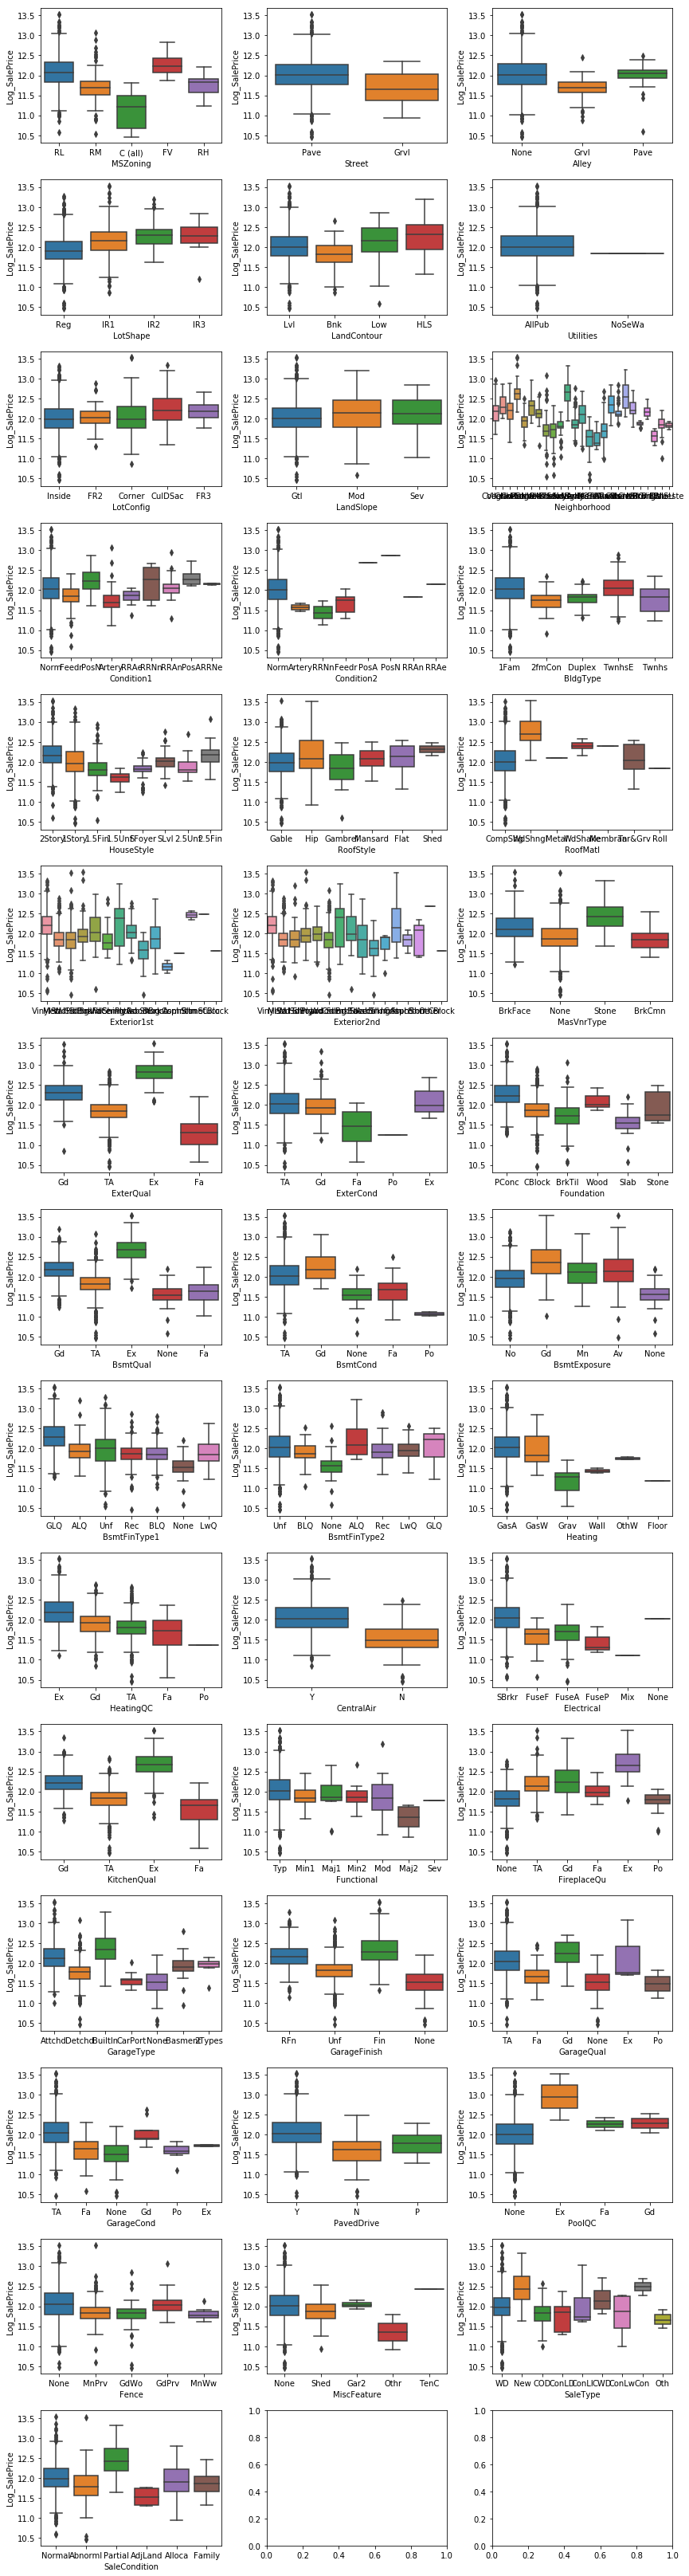

In [79]:
#Relationship to the target feature:Log_SalePrice in a boxplot

categ_list = list(categorical)
n_rows = 15
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*4, n_rows*3))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols+c
        if i < len(categ_list):
            sns.boxplot(x = categ_list[i], y = target, data = trainset, ax = axs[r][c])
            
plt.tight_layout()

- Based on the significant observable variations in the boxplots, the categorical variables(features) with a strong correlation with subject to the target (variable) feature are selected.

In [80]:
corr = trainset.corr()
corr_abs = corr.abs()
target = 'Log_SalePrice'

In [81]:
corr = trainset.corr()
corr_abs = corr.abs()
target = 'Log_SalePrice'

num_ft = len(categ_list)
cor_target = corr_abs.nlargest(num_ft, target)[target] 
#returns the n number of rows, ordered by the columns with the largest values in column in descending order
print(cor_target)

Log_SalePrice    1.000000
OverallQual      0.821404
GrLivArea        0.725211
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
BsmtFinSF1       0.392283
LotFrontage      0.352432
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
LotArea          0.260544
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
MiscVal          0.020012
Id               0.017774
BsmtHalfBath     0.005124
BsmtFinSF2       0.004863
Name: Log_Sa

From the above output, we can drop those features with a weak correlation to the targe variable, since they dont contribute much to the predictions of our model. We can set a minimum correlation and any feature below this value should be dropped.

- We can set our minimum correlation value of 0.5 and this can be away of minimizing the features in your data.

In [82]:
#Features with a strong correlation with the target variable
categ_strongcorr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

In [83]:
#Features with a weak correlation with the target variable
categ_weakcorr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'GarageCond',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'Condition1', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

In [84]:
# Creating a function that plots heatmap of each of the numeric features with a correlation greater than the threshold value of 0.5 to the target feature.

def plot_corr_matrix(dat_f, nr_c, targvar) :
    
    cor = dat_f.corr()
    cor_abs = cor.abs()
    cols = cor_abs.nlargest(nr_c, targvar)[targvar].index
    cm = np.corrcoef(dat_f[cols].values.T)
    
    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )

We have 12 features with correlation above the 0.5 set threshold and 26 features below the value of 0.5.This information above will help when undertaking
 feature reduction.

In [85]:
above_thresh # Features with a correlation above threshold

['Log_SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt']

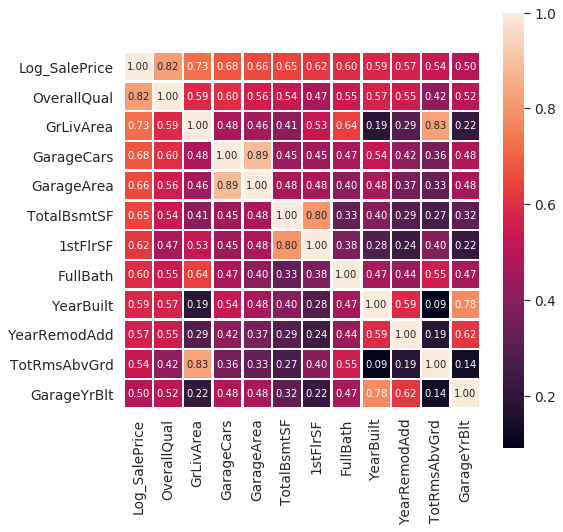

In [86]:

len_above = len(above_thresh)

plot_corr_matrix(trainset, len_above, target)

### Data Transformation/Wrangling
- To enable easier data manipulation it is normally recommended to transform data and map it from one form to another to create uniformity and make it more appropriate for analytical purposes. This is done in both the train and the test data to ensure that uniformity is upheld.



In [87]:
#Dropping the first column Id from the testset dataframe
id_test = testset['Id'] 

to_drop_num  = below_thresh
to_drop_catg = categ_weakcorr

dropcols = to_drop_num + to_drop_catg 

for df in [trainset, testset]:
    df.drop(dropcols, inplace= True, axis = 1)

In [88]:
print(below_thresh)

['Fireplaces', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


In [89]:
#Obtaining the new dimensions of the dataframe
testset.shape

(1459, 21)

In [90]:
#The Neighborhood feature was removed to be plotted separately
categ_st = categ_strongcorr.copy()
categ_st.remove('Neighborhood')

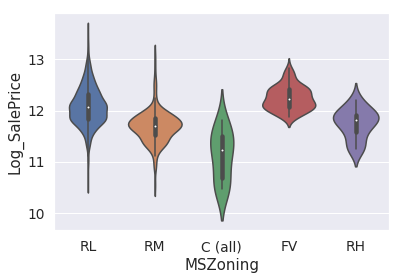

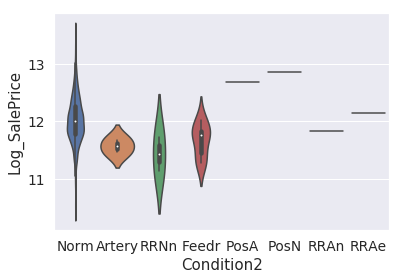

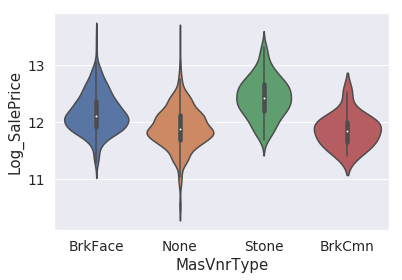

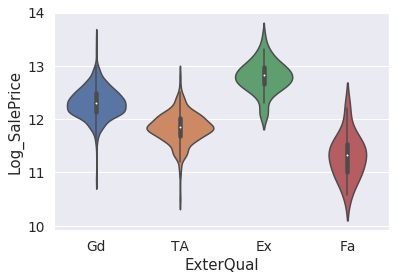

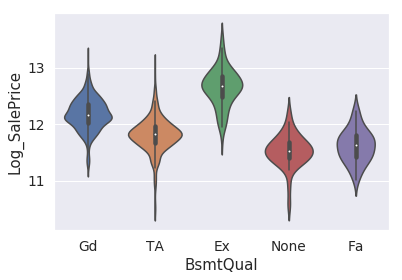

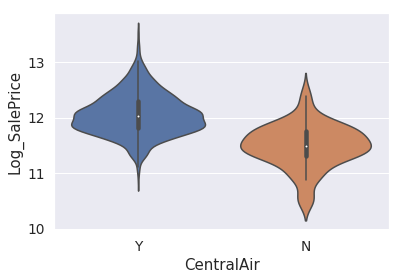

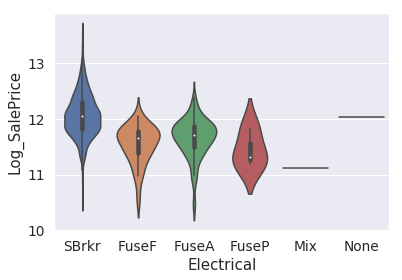

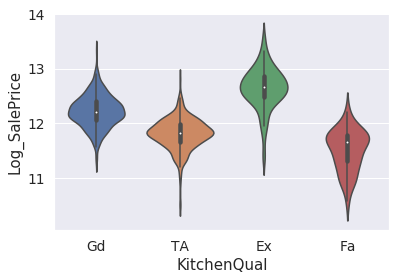

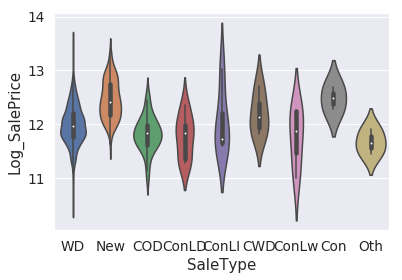

In [91]:
for cat in categ_st:
    sns.violinplot(x=cat, y=target, data = trainset)
    plt.show()

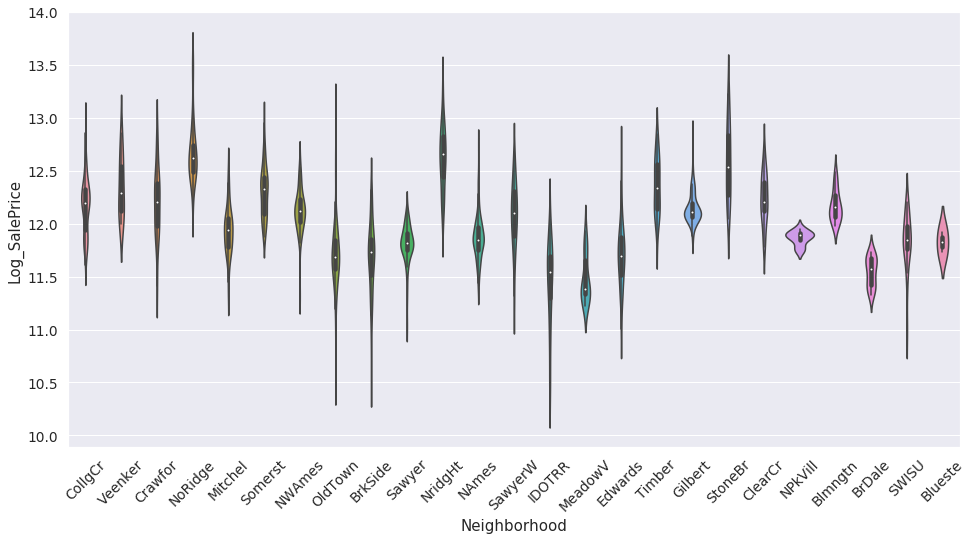

In [92]:
# Violinplot plotting the neighborhood variable against the target variable 
plt.figure(figsize = (16,8))

sns.violinplot(x= 'Neighborhood', y = target, data = trainset)
plt.xticks(rotation = 45)
plt.show()


In [93]:
#Printing the list containing the names of the remaining categorical string variables
print(categ_st)

['MSZoning', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType']


In [94]:
len(categ_st)

9

In [95]:
#To obtain the mean Saleprice of each of the unique values for each of the categorical columns including neighborhood column:
print(trainset.groupby('Neighborhood')[target].mean())

Neighborhood
Blmngtn    12.169416
Blueste    11.826536
BrDale     11.547864
BrkSide    11.679727
ClearCr    12.239900
CollgCr    12.163641
Crawfor    12.206659
Edwards    11.705322
Gilbert    12.155803
IDOTRR     11.446889
MeadowV    11.474522
Mitchel    11.933948
NAmes      11.868045
NPkVill    11.866477
NWAmes     12.130609
NoRidge    12.676000
NridgHt    12.619411
OldTown    11.703865
SWISU      11.838435
Sawyer     11.811468
SawyerW    12.090689
Somerst    12.296495
StoneBr    12.585486
Timber     12.363455
Veenker    12.344176
Name: Log_SalePrice, dtype: float64


In [96]:
# Mean values for the unique entries in the other categorical values
for cat in categ_st:
    print(trainset.groupby(cat)[target].mean(), '\n', '\n', '_'*25)

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085939
RM         11.692893
Name: Log_SalePrice, dtype: float64 
 
 _________________________
Condition2
Artery    11.570036
Feedr     11.670631
Norm      12.025925
PosA      12.691580
PosN      12.860999
RRAe      12.154779
RRAn      11.827043
RRNn      11.435329
Name: Log_SalePrice, dtype: float64 
 
 _________________________
MasVnrType
BrkCmn     11.853239
BrkFace    12.163630
None       11.896884
Stone      12.431016
Name: Log_SalePrice, dtype: float64 
 
 _________________________
ExterQual
Ex    12.792412
Fa    11.304541
Gd    12.311282
TA    11.837985
Name: Log_SalePrice, dtype: float64 
 
 _________________________
BsmtQual
Ex      12.650235
Fa      11.617600
Gd      12.179882
None    11.529680
TA      11.810855
Name: Log_SalePrice, dtype: float64 
 
 _________________________
CentralAir
N    11.491858
Y    12.061099
Name: Log_SalePrice, dtype: float64 
 
 _________________________
Electrical

- To transform the unique values in the categorical variables, it is first necessary to classify them. This is done based on the means computed above as shown below.

In [97]:
#Classifying the unique values in the categorical variables based on the computed means

# Neighborhood
nh_categ2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nh_categ3 = ['NoRidge', 'NridgHt', 'StoneBr']

## 'MSZoning'
msz_categ2 = ['RM', 'RH']
msz_categ3 = ['RL', 'FV'] 

# Condition2
con2_categ2 = ['Norm', 'RRAe']
con2_categ3 = ['PosA', 'PosN'] 

# SaleType
ST_categ1 = ['Oth']
ST_categ3 = ['CWD']
ST_categ4 = ['New', 'Con']



In [ ]:
# Converting the categorical variables to numeric columns in the trainset and testset
# This is done by outputting them in separate columns.

for df in [trainset, testset]:
    
    df['msz_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_categ2) ), 'msz_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_categ3) ), 'msz_num'] = 3        
    
    df['nh_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nh_categ2) ), 'nh_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nh_categ3) ), 'nh_num'] = 3    

    df['cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(con2_categ2) ), 'cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(con2_categ3) ), 'cond2_num'] = 3    
    
    df['mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 
    
    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['st_num'] = 2       
    df.loc[(df['SaleType'].isin(ST_categ1) ), 'st_num'] = 1  
    df.loc[(df['SaleType'].isin(ST_categ3) ), 'st_num'] = 3  
    df.loc[(df['SaleType'].isin(ST_categ4) ), 'st_num'] = 4

- The correlaton of the new columns created with respect to the target variable are shown below.

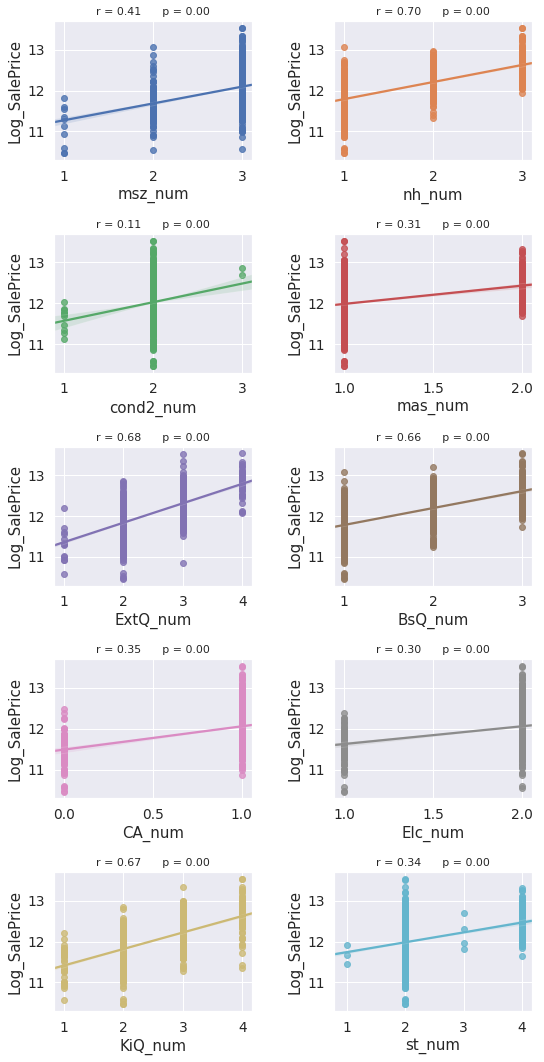

In [ ]:
#correlation of the new numerical columns to the Log_SalePrice

new_col_num = ['msz_num', 'nh_num', 'cond2_num', 'mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'st_num']

nr_rows = 5
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))
plt.subplots_adjust(bottom=1,right=2, top=3)

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(new_col_num):
            sns.regplot(trainset[new_col_num[i]], trainset[target], ax = axs[r][c])
            stp = stats.pearsonr(trainset[new_col_num[i]], trainset[target])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)

plt.tight_layout()    
plt.show()
           

In [ ]:
# This can be output as shown below:
corev = trainset.corr()
cor_abs = corev.abs()

allcols = len(trainset)
ser_corr_1 = cor_abs.nlargest(allcols, target)[target]
print(ser_corr_1)

Log_SalePrice    1.000000
OverallQual      0.821404
GrLivArea        0.725211
nh_num           0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
msz_num          0.409423
CA_num           0.351598
st_num           0.337469
mas_num          0.313280
Elc_num          0.304857
cond2_num        0.107610
Name: Log_SalePrice, dtype: float64


- From the results obtained above, the categorical columns and the new numeric columns which have less than a threshold coefficient of (0.5)

In [ ]:
#Dropping variables that do not meet the threshold coefficient for both the trainset and testset

cat_colsdrop = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']
cols_below_corr = list(ser_corr_1[ser_corr_1.values <= mincorval].index)


for df in [trainset, testset] :
    df.drop(cat_colsdrop, inplace= True, axis = 1)
    df.drop(cols_below_corr, inplace= True, axis = 1)

- Obtaining the edited/ modified columns in terms of their correlation to the target variable 

In [ ]:
#Variables from the modified trainset dataframe
corr2 = trainset.corr()
corr_abs_2 = corr2.abs()

all_cols = len(trainset)
ser_corr_2 = corr_abs_2.nlargest(all_cols, target)[target]

print(ser_corr_2)

Log_SalePrice    1.000000
OverallQual      0.821404
GrLivArea        0.725211
nh_num           0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Name: Log_SalePrice, dtype: float64


- Similar to what was done for the numerical variables, the skewness and kurtosis of the selected categorical features is checked and corrected prior to modeling.

In [ ]:
# Creating a list of the categorical variables above correlation threshold.
cat_abov = list(ser_corr_2[ser_corr_2.values > mincorval].index)
print(cat_abov)


['Log_SalePrice', 'OverallQual', 'GrLivArea', 'nh_num', 'ExtQ_num', 'GarageCars', 'KiQ_num', 'BsQ_num', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt']


In [ ]:
#Checking the skewness and kurtosis of the selected caterogical features based on correlation.
for col in cat_abov:
    print('{:15}'.format(col),
         'Skewness: {:06.5f}'.format(trainset[col].skew()), '  ',
          
         'Kurtosis: {:06.5f}'.format(trainset[col].kurt()))

Log_SalePrice   Skewness: 0.12157    Kurtosis: 0.80476
OverallQual     Skewness: 0.20079    Kurtosis: 0.07496
GrLivArea       Skewness: 1.01099    Kurtosis: 2.06346
nh_num          Skewness: 0.77414    Kurtosis: -0.51087
ExtQ_num        Skewness: 0.82005    Kurtosis: 0.05037
GarageCars      Skewness: -0.34238    Kurtosis: 0.22211
KiQ_num         Skewness: 0.38418    Kurtosis: -0.24343
BsQ_num         Skewness: 0.61980    Kurtosis: -0.58935
GarageArea      Skewness: 0.13175    Kurtosis: 0.76129
TotalBsmtSF     Skewness: 0.51170    Kurtosis: 1.77011
1stFlrSF        Skewness: 0.88764    Kurtosis: 1.11739
FullBath        Skewness: 0.03127    Kurtosis: -0.86997
YearBuilt       Skewness: -0.61229    Kurtosis: -0.43983
YearRemodAdd    Skewness: -0.50184    Kurtosis: -1.27392
TotRmsAbvGrd    Skewness: 0.66050    Kurtosis: 0.85758
GarageYrBlt     Skewness: -0.66718    Kurtosis: -0.26665


- As can be seen above, the skewness and kurtosis of categorical features that meet the threshold correlation is within acceptable range, below (-/+2). There is hence no need to perform a log transformation.

In [ ]:
def plot_corr_matrix(df, nr_c, targ) :
    
    cor = df.corr()
    cor_abs = cor.abs()
    cols = cor_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)
    
    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )

#### Plotting a correlation matrix of the remaining combined features

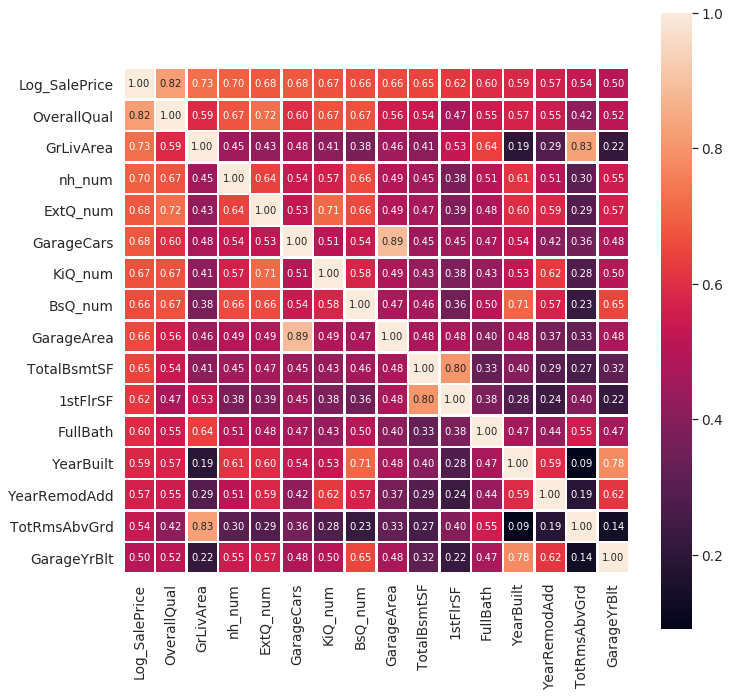

In [ ]:
no_feats=len(trainset.columns)
plot_corr_matrix(trainset, no_feats, target)
#plt.subplots_adjust(bottom=1,right=2, top=3)


### Multicolinearity
- To reduce more features, the plot obtained above can be used to check for features that have a high correlation coefficient to one another, above 0.8.
- The metric for dropping such features will be restricted to those that have multicolinearity but have low correlation with the target variable.

In [ ]:
#Setting new variables for the train and test set features.
cols = list(trainset.columns)
colte = list(testset.columns) 
print(cols)

['MSZoning', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'Log_SalePrice', 'nh_num', 'ExtQ_num', 'BsQ_num', 'KiQ_num']


In [ ]:
#Column List for the testset
print(colte)


['MSZoning', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'nh_num', 'ExtQ_num', 'BsQ_num', 'KiQ_num']


In [ ]:
#Removing columns with high colinearity but low correlation with the target variable.
for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt', 'Log_SalePrice']:
    if col in colte:
        colte.remove(col)
print(colte)

['MSZoning', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars', 'nh_num', 'ExtQ_num', 'BsQ_num', 'KiQ_num']


In [ ]:
#Dropping columns with high colinearity but low correlation with target variable, and the target variable

for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt', 'Log_SalePrice']:
    if col in cols:
        cols.remove(col)
print(cols)

['MSZoning', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars', 'nh_num', 'ExtQ_num', 'BsQ_num', 'KiQ_num']


In [ ]:
features = cols.copy()
feats= colte.copy()

In [ ]:
#Remaining Features for the trainset
features

['MSZoning',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'GrLivArea',
 'FullBath',
 'GarageCars',
 'nh_num',
 'ExtQ_num',
 'BsQ_num',
 'KiQ_num']

In [ ]:
#Remaining Features for the testset
feats

['MSZoning',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'GrLivArea',
 'FullBath',
 'GarageCars',
 'nh_num',
 'ExtQ_num',
 'BsQ_num',
 'KiQ_num']

In [ ]:
traindf = trainset[features].copy()
testdf = testset[feats].copy()

y = trainset[target]


In [ ]:
#Dropping the column MSZoning for both datasets.
#This is beacause as per the metrics used it ranks low in feature importance 
#It also appears as a categorical variable when performing preprocessing procedures.
traindf = traindf.drop('MSZoning', axis = 1)
testdf = testdf.drop('MSZoning', axis = 1)

In [ ]:
#Viewing a sample of the traindf
traindf.sample(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,nh_num,ExtQ_num,BsQ_num,KiQ_num
800,6,1997,1997,616,1688,2,2,2,2,2,3
865,5,1970,1970,1002,1002,1,2,1,2,1,2
1114,5,1954,2000,833,833,1,1,1,2,1,3
683,9,2002,2002,1626,1668,2,3,2,3,2,3
761,5,1924,1950,1145,1301,1,2,1,2,1,1


In [ ]:
#Viewing a sample of the testdf
testdf.sample(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,nh_num,ExtQ_num,BsQ_num,KiQ_num
1040,5,1951,1951,1342.0,1342,1,1.0,1,2,1,2
1368,6,1993,1993,1344.0,1440,2,4.0,1,3,2,3
182,8,2000,2001,1058.0,1874,2,2.0,2,3,2,3
578,8,1995,1995,1230.0,1239,1,2.0,2,3,2,3
1382,6,1977,1977,675.0,1388,1,1.0,2,2,2,2


### Data Preprocessing
- This involves the data normalization and standardization procedures. The function used to carry out this function is sklearn.preprocessing.StandardScaler() function() and it does this by removing the mean and scaling to unit variance. It transforms data in such a way that its distribution will have a mean value of 0 and a standard deviation of 1. 

- The standard score of a sample x is calculated as: `z = (x – u) / s`

`x = variable`

`u = mean`

`s = standard deviation`


In [ ]:
#Viewing the columns present in traindf
traindf.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'nh_num', 'ExtQ_num', 'BsQ_num', 'KiQ_num'],
      dtype='object')

In [ ]:
#Standardizing the dataframes, both train and test
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
traindf_sc = sc.fit_transform(traindf)
testdf_sc = sc.fit_transform(testdf)

/home/qiime2/miniconda/envs/qiime2-2019.4/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/qiime2/miniconda/envs/qiime2-2019.4/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/qiime2/miniconda/envs/qiime2-2019.4/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/qiime2/miniconda/envs/qiime2-2019.4/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
#Columns for the new dataframes
colsc = list(traindf.columns)
coltesc = list(testdf.columns)

In [ ]:
#Converting the ndarray to a pandas dataframe
traindf_sc = pd.DataFrame(data = traindf_sc)
testdf_sc = pd.DataFrame(data = testdf_sc)

In [ ]:
#View a random sample of the new dataframe containing the standardized values in the traindf_sc.
traindf_sc.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
1128,-0.795092,0.290951,-0.234267,-0.280920,-1.131497,-1.025620,0.313159,-0.844586,-0.689001,0.648281,-0.770150
1432,-0.795092,0.191559,-0.379653,0.177087,-0.757263,0.793546,0.313159,-0.844586,-0.689001,-0.921808,-0.770150
216,0.658506,1.086090,0.928824,0.924364,-0.146671,0.793546,0.313159,0.658963,1.061109,0.648281,0.741127
431,-0.068293,-1.696897,0.638051,-0.365290,-0.615448,-1.025620,-2.364762,-0.844586,-0.689001,-0.921808,-0.770150
1199,-1.521891,-0.040357,-0.718888,-0.454481,-1.273311,-1.025620,-1.025802,-0.844586,-0.689001,-0.921808,-0.770150


In [ ]:
#View a random sample of the new dataframe containing the standardized values in the testdf_sc.
testdf_sc.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
180,-0.054877,0.218640,0.678742,0.212100,0.455200,0.773083,0.301622,0.702569,-0.678102,-0.904990,-0.769730
1038,-1.447325,-0.439695,0.489377,-2.363618,-1.118760,-1.028720,-0.988014,-0.791671,-0.678102,-0.904990,0.741758
948,-0.751101,-0.373861,-1.120226,0.221137,-0.704669,-1.028720,-0.988014,-0.791671,-0.678102,-0.904990,-0.769730
184,-0.751101,0.119890,-0.410107,1.298872,0.278027,0.773083,0.301622,0.702569,-0.678102,0.621461,-0.769730
1362,-0.054877,-1.196781,0.300012,1.784643,4.503411,2.574887,0.301622,-0.791671,-0.678102,-0.904990,0.741758


#### Splitting the Data
After datta preparation and cleaning, then we need to split our train data set into training set and validation set.

In this case our train dataset was splitted into X and Y, where X acted as the training set and Y as the validation set.

In [ ]:
#Setting the X and Y prior to modelling
#Splitting the data to X and the Y(target)

X = traindf.copy() #Creates a recursive copy of the dataframe without affecting the original data
y = trainset[target] #Subsetting the trainset to obtain the target variable to be used for predicting.
X_test = testdf.copy()# Creating a copy of the dataframe to be used as the testset.




In [ ]:
#Creating new variables from the standardized dataframes
X_sc = traindf_sc.copy()
Xtesc = testdf_sc.copy()

In [ ]:
#Getting column summary information of X training set dataframe
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 11 columns):
OverallQual     1458 non-null int64
YearBuilt       1458 non-null int64
YearRemodAdd    1458 non-null int64
TotalBsmtSF     1458 non-null int64
GrLivArea       1458 non-null int64
FullBath        1458 non-null int64
GarageCars      1458 non-null int64
nh_num          1458 non-null int64
ExtQ_num        1458 non-null int64
BsQ_num         1458 non-null int64
KiQ_num         1458 non-null int64
dtypes: int64(11)
memory usage: 136.7 KB


In [ ]:
#Getting column information of X training set dataframe
Xtesc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
0     1459 non-null float64
1     1459 non-null float64
2     1459 non-null float64
3     1459 non-null float64
4     1459 non-null float64
5     1459 non-null float64
6     1459 non-null float64
7     1459 non-null float64
8     1459 non-null float64
9     1459 non-null float64
10    1459 non-null float64
dtypes: float64(11)
memory usage: 125.5 KB


### Modelling

- This first using a grid search for selecting the best hyperparameters for the model to be used. These models are imported from sci-kit learn. This is done by tuning hyperparameters that are specified based on a specific scoring parameter. The best hyperparameters for a model are those that give the best scoring values/metrics.
- The following regressors from sklearn were used: `Linear Regression`, `Ridge Regression`,`Lasso`, `Stochastic Gradient Descent`, `Elastic Net`, `Random Forest Regresor`, `XGBoost` and the `DecisionTreeRegressor`. 
- Below a function is specified that performs a gridsearch and outputs the best RMSE (Root Mean Square Error value) that is generated from the best parameters.


In [ ]:
#Gridsearch function

nr_cv = 7 #No of folds

def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score, '\n')    
    print(grid.best_params_, '\n')
    print(grid.best_estimator_)
    
    return best_score

- It is important to note **Cross validation** is done within the gridsearch as specified in the above function.
- A model is trained using `k-1` of the folds of the training data, while the resulting model is then validated on the remaining part of the data.

In [ ]:
from sklearn.model_selection import GridSearchCV
scor = 'neg_mean_squared_error' # Metric for tuning the hyperparameter that will be used to evaluate prediction on the test data

### i. Linear Regression

- LinearRegression fits a linear model with coefficients `w = (w1, …, wp)` to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
#Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
parameters = {'fit_intercept':[True,False], 'normalize':[True], 'copy_X':[True, False]}
grid_linear = GridSearchCV(lin_reg, parameters, cv=nr_cv, verbose=1 , scoring = scor)
grid_linear.fit(X_sc, y)

linearsc = get_best_score(grid_linear)

Fitting 7 folds for each of 4 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.1493378675017762 

{'copy_X': True, 'fit_intercept': True, 'normalize': True} 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.6s finished


In [ ]:
linearsc = get_best_score(grid_linear)

0.1493378675017762 

{'copy_X': True, 'fit_intercept': True, 'normalize': True} 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [ ]:
lin = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
lin.fit(X_sc, y)
pred_lin = lin.predict(Xtesc)

In [ ]:
newtest_df = pd.read_csv('test.csv')
newtest_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
linreg = pd.DataFrame()# Creating a new data frame and storing it in a new variable
linreg['Id'] = newtest_df['Id'] #Subsetting the `Id` from the newtest_df dataframe.

#The irrational number e is also known as Euler’s number and is the base of the natural logarithm
linreg['SalePrice'] = np.exp(pred_lin) #Natural Log

linreg.sample(5)# Obtaining 5 random entries from the dataframe

,Id,SalePrice
539,2000,330303.778050
131,1592,119619.939630
689,2150,195663.286617
1048,2509,237905.639007
1047,2508,267899.468409


### Lasso Regression
- Lasso regression (**Least Absolute Shrinkage and Selection Operator**) also known as L1 regularization is pretty much similar to the *ridge* regularization in that it penalizes large coefficients making the model prefer smaller coefficients/weights.
- In this type of regularization, the weights shrink by a constant amount towards 0 while in ridge regression the weights shrink by an amount proportional to *w* (the slope). So when a specific weight has a large magnitude, |w|, L1 regularization shrinks the weight much less than L2 regularization does. By contrast, when |w| is small, L1 regularization shrinks the weight much more than L2 regularization.
- L1 / Lasso regularization net result tends to concentrate the weight of the network in a relatively small number of high-importance connections (perform feature selection), while the other weights are propelled towards zero meaning that some of the features are entirely disregarded for the output evaluation. Lasso can therefore be an important tool in feature selection too.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
#Setting alpha for regularization
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1,10,100], 'normalize':[True,False], 'max_iter': [10e5], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
#Loading the folds from the gridsearch
grid_lasso = GridSearchCV(lasso, parameters, cv=nr_cv, verbose=1, scoring = scor)
#Fitting the model
grid_lasso.fit(X_sc, y)

lasso_sc = get_best_score(grid_lasso)

Fitting 7 folds for each of 96 candidates, totalling 672 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.14931500062014796 

{'alpha': 0.001, 'max_iter': 1000000.0, 'normalize': False, 'tol': 0.0001} 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=1)]: Done 672 out of 672 | elapsed:   12.7s finished


In [ ]:
#Getting the best score
lasso_sc = get_best_score(grid_lasso)

0.14931500062014796 

{'alpha': 0.001, 'max_iter': 1000000.0, 'normalize': False, 'tol': 0.0001} 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


#### Ridge Regression
- Ridge regression (also known as *L2 regularization*) is one among the techniques used to reduce model complexity and prevent overfitting that may be as a result of linear regression. In this model the cost function is altered by incorporating a penalty equivalent to square of the magnitude of the coefficients. It hence shrinks the coefficient helping reduce multi-colinearity and complexity
- Together with LASSO and Elastic-Net, they are regularization techniques that are employed for penalization of large coefficients. This avoids overfitting. However, the strength of the penalty should be tuned.
- **Alpha** is a parameter for regularization. It is also known as a **penalty term**, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.



In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
#Alpha Regularization
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1,10,100], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
#Note that 'Alpha - Regularization strength' is set at different values.
grid_ridge = GridSearchCV(ridge, parameters, cv=nr_cv, verbose=1, scoring = scor)
grid_ridge.fit(X_sc, y)

ridge_sc = get_best_score(grid_ridge)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 7 folds for each of 64 candidates, totalling 448 fits
0.14932117332441278 

{'alpha': 10, 'normalize': False, 'tol': 1e-06} 

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=1e-06)


[Parallel(n_jobs=1)]: Done 448 out of 448 | elapsed:    8.6s finished


In [ ]:
#Getting the best score
ridge_sc = get_best_score(grid_ridge)

0.14932117332441278 

{'alpha': 10, 'normalize': False, 'tol': 1e-06} 

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=1e-06)


In [ ]:
pred_grid_ridge = grid_ridge.predict(Xtesc)
print(len(pred_grid_ridge))

1459


In [ ]:
#Preparing the final predicitions for submission
final_grid_ridge = pd.DataFrame()
final_grid_ridge['Id'] = newtest_df['Id']
final_grid_ridge['SalePrice'] = np.exp(pred_grid_ridge)
final_grid_ridge.head(10)

,Id,SalePrice
0,1461,111004.939842
1,1462,150675.054625
2,1463,170385.857111
3,1464,187234.643422
4,1465,213302.586372
5,1466,175904.956055
6,1467,166614.825398
7,1468,169194.442897
8,1469,201096.182172
9,1470,113278.332143


In [ ]:
final_grid_ridge.to_csv('ridge.csv')

### Elastic Net Regression
- This is also a penalized regularization model which basically combines penalties from both L1 and L2 regularization.
- It aims at reducing the loss function where α is the mixing parameter between ridge (α = 0) and lasso (α = 1) creating a penalty which is a combination between L1 and L2.



In [ ]:
from sklearn.linear_model import ElasticNet

elas = ElasticNet(alpha=1.0,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=42,
    selection='cyclic')
#Setting the parameters
parameters = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1], 
              'fit_intercept' : [False, True], 'normalize':[True,False], 'tol':[1e-02,1e-03,1e-04]}
grid_elas = GridSearchCV(elas, parameters, cv=nr_cv, verbose=1, scoring = scor)
#Fitting the model
grid_elas.fit(X_sc, y)
#Requesting the best score form the gridsearch
sc_elas = get_best_score(grid_elas)

Fitting 7 folds for each of 360 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.15064546332564632 

{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.01, 'max_iter': 1000000, 'normalize': False, 'tol': 0.01} 

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.01,
      max_iter=1000000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.01, warm_start=False)


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   45.2s finished


In [ ]:
#Printing out the best score from the model
sc_elas = get_best_score(grid_elas)

0.15064546332564632 

{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.01, 'max_iter': 1000000, 'normalize': False, 'tol': 0.01} 

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.01,
      max_iter=1000000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.01, warm_start=False)


In [ ]:
pred_elas = grid_elas.predict(Xtesc)
print(len(pred_elas))

1459


In [ ]:
#Preparing the final predicitions for submission
final_elas = pd.DataFrame()
final_elas['Id'] = newtest_df['Id']
final_elas['SalePrice'] = np.exp(pred_elas)
final_elas.head(10)

,Id,SalePrice
0,1461,111918.213011
1,1462,148283.050445
2,1463,170388.408141
3,1464,185223.618112
4,1465,217391.733189
5,1466,175346.245214
6,1467,169110.166123
7,1468,169709.459307
8,1469,195557.115598
9,1470,114520.501545


In [ ]:
final_elas.to_csv('elas.csv')

### SGD Regressor
- SGD stands for stochastic Gradient Descent. In this model, the gradient of the loss is estimated each sample at a time, and the model is updated along the way with a decreasing learning rate.
- The regularizer used is a penalty added to the loss function that shrinks the model parameters towards 0, using L2 (α = 0) and L1 (α = 1) or a combination of both (elastic net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve feature selection.

In [ ]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor()
parameters = {'max_iter' :[10000, 10e5], 'alpha':[1e-05, 1e-04, 1e-03, 1e-02, 1e-01], 'epsilon':[1e-02], 'fit_intercept' : [True, False], 'loss' : ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'] }
grid_sgdr = GridSearchCV(sgdr, parameters, cv=nr_cv, verbose=1, scoring = scor)
grid_sgdr.fit(X_sc, y)

sc_sgdr = get_best_score(grid_sgdr)

Fitting 7 folds for each of 80 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
#Printing out the best SGD score
sc_sgdr = get_best_score(grid_sgdr)

### Decision Tree Regressor
- Decision Trees  are a non-parametric supervised learning method. They can be used for both classification and regression. 
- They aim at creating a model that predicts the value of a target variable by learning simple decision rules inferred from the features of the data.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Setting the working parameters
# max_depth is The maximum depth of the tree.
# max_features are the number of features to consider when looking for the best split.
# min_samples_split are the minimum number of samples required to split an internal node
# min_samples_leaf is the minimum number of samples required to be at a leaf node

param_grid = { 'max_depth' : [7,8,9,10] , 'max_features' : [7, 8, 9, 10] , 'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30], 'presort': [False,True] , 'min_samples_leaf': [8, 10, 12, 14]}
            
grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=nr_cv, refit=True, verbose=1, scoring = scor)
grid_dtree.fit(X_sc, y)

dtree = get_best_score(grid_dtree)

In [ ]:
#Printing out the best DTR score
dtree = get_best_score(grid_dtree)

In [ ]:
pred_dtr = grid_dtree.predict(Xtesc)
print(len(pred_dtr))

In [ ]:
#Transforming the final output
final_result = pd.DataFrame()
final_result['SalePrice'] = np.exp(pred_dtr)
final_result.head(10)

In [ ]:
import pip
pip.main(['install', 'xgboost'])

### XGBoost
- XGBoost is an optimized distributed gradient boosting technique that serves as a tree method to give parallel boosting.
- XGBoost produces extremely accurate models but can be prone to over-fitting, which contrasts well with Random Forest. The general methodology of boosting is that it creates a decision tree, and for every subsequent decision tree, it utilizes the residuals of that previous tree to make its prediction. As the number of trees in the boosting model is increased, the results become closer to their true value. 
- This can lead to very accurate results but can generate strong over-fitting as the model's parallel trees are correlated with each other.

In [ ]:
# XGBoost

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

xgbr = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.0163,
                             subsample=0.5213, silent=1,seed=7, nthread = -1)
parameters = {'max_iter' :[10000, 10e5], 'alpha':[1e-05, 1e-04, 1e-03, 1e-02, 1e-01], 'epsilon':[1e-02], 'fit_intercept' : [True, False], 'loss' : ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'] }
grid_xgbr = GridSearchCV(xgbr, parameters, cv=nr_cv, verbose=1, scoring = scor)
grid_xgbr.fit(X_sc, y)

xgbr = get_best_score(grid_xgbr)

sc_gbr = get_best_score(grid_xgbr)




In [ ]:
pred_xgbr = grid_xgbr.predict(Xtesc)
print(len(pred_xgbr))

In [ ]:
#Preparing the final predicitions for submission
final_xgbr = pd.DataFrame()
final_xgbr['Id'] = newtest_df['Id']
final_xgbr['SalePrice'] = np.exp(pred_xgbr)
final_xgbr.head(10)

In [ ]:
traindf.sample(5)

In [ ]:
final_xgbr.to_csv('xgbr.csv')

#### Visualizing one of our best performing, XGBM model prediction against actual prices.

In [ ]:
## Importing necessary Libraries



from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

traindf1=traindf

traindf1['Log_SalePrice']=trainset['Log_SalePrice']

X=traindf1.drop("Log_SalePrice",axis=1).values
y=traindf1["Log_SalePrice"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = xgb.XGBRegressor()  
regressor.fit(X_train, y_train)
#coeff_df = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])  
#coeff_df

## Comparing the difference between the actual predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

## Visualising the difference between the actual and predicted values
df1.plot(kind='bar',figsize=(10,8), title="Visual of the Difference between the predicted values and the actual values")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Light GBM
- Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification, regression and many other machine learning problems.
- It splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm reduces more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. 

In [ ]:
import pip
pip.main(['install', 'lightgbm'])

In [ ]:
# LightGBM

from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

lgbr = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
parameters = {'max_iter' :[10000, 10e5], 'alpha':[1e-05, 1e-04, 1e-03, 1e-02, 1e-01], 'epsilon':[1e-02], 'fit_intercept' : [True, False], 'loss' : ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'] }
grid_lgbr = GridSearchCV(lgbr, parameters, cv=nr_cv, verbose=1, scoring = scor)
grid_lgbr.fit(X_sc, y)

lgbr = get_best_score(grid_lgbr)


In [ ]:
#Getting the length of resultant dataframe
pred_lgbr = grid_lgbr.predict(Xtesc)
print(len(pred_lgbr))

In [ ]:
#Preparing the final predicitions for submission
final_lgbr = pd.DataFrame()
final_lgbr['Id'] = newtest_df['Id']
final_lgbr['SalePrice'] = np.exp(pred_lgbr)
final_lgbr.head(10)

In [ ]:
final_lgbr.to_csv('lgbr.csv')

#### Visualizing one of our best performing, LightGBM model prediction against actual prices.

In [ ]:
## Importing necessary Libraries



from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

traindf1=traindf

traindf1['Log_SalePrice']=trainset['Log_SalePrice']

X=traindf1.drop("Log_SalePrice",axis=1).values
y=traindf1["Log_SalePrice"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = lgb.LGBMRegressor()  
regressor.fit(X_train, y_train)
#coeff_df = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])  
#coeff_df

## Comparing the difference between the actual predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1



## Visualising the difference between the actual and predicted values
df1.plot(kind='bar',figsize=(10,8), title="Visual of the Difference between the predicted values and the actual values")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Random Forest
- This is an ensemble Machine Learning Algorithm that uses a bootstrapping or bagging estimator algorithm. The base estimators in random forest are decision trees.
- Random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree.
- Stepwise, this is what happens in a random forest model:
i. Random subsets are created from the original dataset (bootstrapping).
ii. At  each node in the decision tree, only a random set of features are considered to decide the best split.
iii. A decision tree model is fitted for each of the subsets
iv. Final prediction is calculated by averaging the predictions from all decision trees.

In [ ]:
#RANDOMIZEDSEARCH CV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
grid_rf = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=nr_cv, n_iter = 50, refit=True, verbose=1, random_state=42, scoring = scor)
grid_rf.fit(X_sc, y)

sc_rf = get_best_score(grid_rf)

In [ ]:
X_sc.head()

In [ ]:
# Create a copy of X_sc and normalize the figures using minmax scaler to remove the negatives
X_scc = X_sc.copy()
X_scc.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X_scc))
MinMaxScaler()
newScc = pd.DataFrame(scaler.transform(X_scc))


In [ ]:
newScc.head()

In [ ]:
y.isnull().sum()

In [ ]:
np.sqrt(np.finfo(np.float64).eps**4*np.ones(8192, dtype=np.float64))

In [ ]:
pred_rf = grid_rf.predict(Xtesc)
print(len(pred_rf))

In [ ]:
#Preparing the final predicitions for submission
final_rf = pd.DataFrame()
final_rf['Id'] = newtest_df['Id']
final_rf['SalePrice'] = np.exp(pred_rf)
final_rf.head(10)

In [ ]:
final_rf.to_csv('frr.csv')

#### Visualizing one of our best performing, Random Forest model prediction against actual prices.

In [ ]:
## Importing necessary Libraries



from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

traindf1=traindf

traindf1['Log_SalePrice']=trainset['Log_SalePrice']

X=traindf1.drop("Log_SalePrice",axis=1).values
y=traindf1["Log_SalePrice"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = RandomForestRegressor()  
regressor.fit(X_train, y_train)
#coeff_df = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])  
#coeff_df

## Comparing the difference between the actual predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1



## Visualising the difference between the actual and predicted values
df1.plot(kind='bar',figsize=(10,8), title="Visual of the Difference between the predicted values and the actual values")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### RMSE Comparisons From Various Models and Correlation of Predictions



In [ ]:
scores_list = [linearsc, lasso_sc, ridge_sc, sc_elas, sc_sgdr, dtree, xgbr, lgbr, sc_rf]

regressor_list = ['Linear', 'Ridge', 'Lasso', 'ElaNet', 'SGD', 'Dtree', 'XGB', 'LGB', 'RF']

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10,9)
sns.barplot(x=regressor_list, y=scores_list, ax=ax)
plt.ylabel('RMSE')
plt.xlabel('Regressor Model Names')

- According to the plots above **RandomForest Regressor** and **XGBoost** have the lowest **RMSE(Root Mean Square Error)** score in comparision to other regressor models; It is possible that through proper hyperparameter the models including random forest could still have a much lower RMSE.

In [ ]:
## Comparing the predictions generated by each of the regression models
predictions = {'linear' : grid_linear.predict(Xtesc), 'Ridge' : grid_ridge.predict(Xtesc), 'Lasso' : grid_lasso.predict(Xtesc), 'Elastic Net' : grid_elas.predict(Xtesc), 'SGD' : grid_sgdr.predict(Xtesc), 'Decision Tree' : grid_dtree.predict(Xtesc), 'XGBoost' : grid_xgbr.predict(Xtesc), 'LGBoost' :grid_lgbr.predict(Xtesc), 'RandomForest' : grid_rf.predict(Xtesc)}

df_pred = pd.DataFrame(predictions)
df_pred.corr()

In [ ]:
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.25)
sns.heatmap(df_pred.corr(), linewidths=1.5, cmap='seismic', annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=df_pred.columns , xticklabels=df_pred.columns
            )

In [ ]:
trainset.sample(5)

### Saving the Model

`Save and Load Machine Learning Models in Python with scikit-learn`

Finding an accurate machine learning model is not the end of the project.

After developing a Machine Learning Model, we'll need to save our prediction models to file, and then restore them in order to reuse or making predictions(https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/, https://machinelearningmastery.com/how-to-save-and-load-models-and-data-preparation-in-scikit-learn-for-later-use).

`WHY We need to save and restore/reload later our ML Model , so as to;`
-  test our model on/with new data,

- compare multiple models

Object serialization: This is a process / procedure of saving a ML Model is also known as object serialization - representing an object with a stream of bytes, in order to store it on disk, send it over a network or save to a database.

Deserialization: This is restoring/reloading of ML Model procedure is known as deserialization.

**We can look at 3 approaches of Saving and Reloading a ML Model:**

1) Pickle Approach

2) Joblib Approach

3) Manual Save and Restore to JSON approach



In [ ]:

## let's use the Joblib to save our ML model for reuse later.
from sklearn.externals import joblib
joblib_file = "joblib_xgbr.pkl"
joblib.dump(xgbr, joblib_file)


### Summary
1. Exploration of the Data to examine and understand any underlying data patterns such as descriptive statistics and missing values.
2. Measuring the skewness and kurtosis of the target variable and doing a log transformation to correct it.
3. Correlation of the numeric features to the target variable was done to visualize the strongly correlated numeric features to the target variable.
4. Data Wrangling was done for the categorical features to transform them into numeric form that can effectively be used to train the model. 
5. After data wrangling, correlation of the categorical features was done to determine the features with strong correlation to the target variable.
6. Model training and Prediction: GridSearchCV and RandomisedsearchCV were performed on the regressor models to get the best hyperparameters for each of the models. Thereafter, prediction was done based on the model with the lowest Root Mean Square Error (RMSE).
